# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Изучение данных из файла

In [1]:
#импорт библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt

#импорт бибилиотеки pandas
import pandas as pd

import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)
#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
#чтение файла с данными и сохранение в переменной data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
#вывод на экран первые 20 строк таблицы
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [3]:
#получение общей информации о данных в таблице 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#получение некоторых числовых показателей для столбцов с числовыми значениями
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [5]:
#data.info()

***Вывод п.1:

I. На первый взгляд изучая таблицу возникли следующие вопросы:


1) В столбце 'first_day_exposition' - дата публикации. Значение указали в часовом поясе UTC+0, в формате ISO. Значит, сначала идут год, месяц, день; затем буквенный разделитель даты и времени T; затем часы, минуты и секунды. 

2) Остальные столбцы сомнений, на первый взгляд, не вызвали.


II. Изучив общую информацию, делаем выводы:

1) В таблице 22 столбца.

Согласно документации к данным: 
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении


2) Количество значений во многих столбцах различается - значит, в данных есть пропущенные значения.

3) Есть столбцы, тип которых не соответствует типу данных:
 
- balcony — число балконов исчисляется целыми числами, указан тип вещественных; 
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - значение должно быть целым, указан тип вещественный;
- first_day_exposition — дата публикации - указан тип object, должен быть тип дата;
- floors_total — всего этажей в доме - исчисляется целыми числами, указан тип вещественных;
- is_apartment — апартаменты (булев тип)- указан тип object;
- parks_around3000 — число парков в радиусе 3 км считают в целых числах, а указан вещественный тип;
- ponds_around3000 — число водоёмов в радиусе 3 км считают в целых числах, а указан вещественный тип;


III. Согласно информации некоторых числовых показателей таблицы:
1) тоже подтверждается факт, что очень много столбцов с пропусками;

2) вызвали подозрения некоторые параметры, которые требуют проверки, по следующим столбцам:
- airports_nearest - минимальное значение;
- ceiling_height - минимальное и максимальное значение;
- days_exposition - максимальное значение, а так же стандартное отклонение велико - могут быть аномальные значения или выбросы;
- floors_total - максимальное значение;
- kitchen_area - минимальное и максимальное значение;
- last_price - максимальное значение, а так же стандартное отклонение велико - могут быть аномальные значения или выбросы;
- living_area - минимальное и максимальное значение;
- parks_nearest - минимальное значение;
- rooms - минимальное и максимальное значение;
- total_area - максимальное значение.

 



In [6]:
#Код ревьюера
import numpy as np

df_test = pd.DataFrame({'a' : [np.NaN,2,3,4], 'b' : [np.NaN,2,3,4]})

print(df_test['a'].dtype)

df_test['a'] = df_test['a'].astype('Int64')

print(df_test['a'].dtype)
print(df_test['b'].dtype)


df_test['b'] = df_test['b'].fillna(42).astype('int')

print(df_test['b'].dtype)

float64
Int64
float64
int64


## 2. Предобработка данных

2.1 Проработаем пропуски

Проверим наличие пропусков и в каких столбцах. Если доля пропусков от 5-15%% - их необходимо проработать.  

In [8]:
#подсчет пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#вывод долевого соотношения количества пропусков
(data.isna().mean()* 100).round(3).sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')

,0
is_apartment,88.291
parks_nearest,65.91
ponds_nearest,61.56
balcony,48.605
ceiling_height,38.799
airports_nearest,23.385
cityCenters_nearest,23.288
parks_around3000,23.284
ponds_around3000,23.284
days_exposition,13.423


In [10]:
#Код ревьюера

(data.isna().mean() * 100).round(3).sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')

,0
is_apartment,88.291
parks_nearest,65.91
ponds_nearest,61.56
balcony,48.605
ceiling_height,38.799
airports_nearest,23.385
cityCenters_nearest,23.288
parks_around3000,23.284
ponds_around3000,23.284
days_exposition,13.423


Еще раз убедились, что пропусков очень много и во многих столбцах.

Проработаем пропуски в следующих столбцах:

- ceiling_height - высота потолков (м), 39% пропусков. Пропусков больше, чем 15%, но считаю, что их можно заменить медианным значением по столбцу, так как высота потолков не очень часто варьирующаяся величина. Медианным - так как вызывает подозрение максимальное значение - возможно есть аномальные значения или выбросы.
- living_area - жилая площадь(кв.м), 8%. Логично заменить эти пропуски мединным значением, в зависимости от группы: Санкт-Петербург и Ленинградская область. Так как считаю, что жилая площадь сильно отличается в этих группах. Медианным - чтобы избежать возможных выбросов и аномальных значений.
- is_apartment - апартаменты, 88%. Пропусков слишком много, чтобы их чем то заменить и это не повлияет на исходный результат. Скорее всего их просто не заполнили, где нет апартаментов или стали заполнять с какого то определенного момента.
- kitchen_area - площадь кухни (кв.м), 10%. Логично заменить эти пропуски мединным значением, в зависимости от группы: Санкт-Петербург и Ленинградская область. Так как считаю, что жилая площадь сильно отличается в этих группах. Медианным - чтобы избежать возможных выбросов и аномальных значений.
- balcony - число балконов, 49%. Так же пропусков слишеом много, поэтому оставим как есть.
- days_exposition - сколько дней было размещено объявление, 13%. Заменим пропуски медианым значением по столбцу. Медианным - чтобы избежать возможных выбросов и аномальных значений.

Ниже приведены столбцы с большим количеством пропусков (более 15%), данные которых отображают кадастровые данные жилых помещений. Мы не имеем разумного решения по их замене, которая бы не искозила исходный резульат, поэтому оставляем эти пропуски как есть.
- airports_nearest - расстояние до ближайшего аэропорта в метрах, 23%
- cityCenters_nearest - расстояние до центра города, 23%
- parks_around3000 - число парков, 23%
- parks_nearest - расстояние до ближайшего парка, 66%
- ponds_around3000 - число водоемов, 23%
- ponds_nearest - расстояние до ближайшего водоема, 62%.



 Итак, 
 1) Проработаем пропуски столбца 'ceiling_height'. Но сначала попробуем разобраться с минимальным и максимальным значением этого столбца, которые вызвали у нас сомнения.
 

In [12]:
#найдем строку с максимальным значением = 100
data[data['ceiling_height'] == data['ceiling_height'].max()]['ceiling_height']

22869   100.00
Name: ceiling_height, dtype: float64

In [13]:
#выведем на экран строку с максимальным значением столбца 'ceiling_height'
data.loc[22869]

total_images                              0
last_price                    15,000,000.00
total_area                            25.00
first_day_exposition    2018-07-25T00:00:00
rooms                                     1
ceiling_height                       100.00
floors_total                           5.00
living_area                           14.00
floor                                     5
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                          11.00
balcony                                5.00
locality_name               Санкт-Петербург
airports_nearest                  34,963.00
cityCenters_nearest                8,283.00
parks_around3000                       1.00
parks_nearest                        223.00
ponds_around3000                       3.00
ponds_nearest                         30.00
days_exposition                       19.00
Name: 22869, dtype: object

Тут видны явные ошибки в данных:
- высота потолка - 100 м - противоречит здравому смыслу;
- количество балконов - 5 - в одной комнатной квартире не может быть столько балконов

Заменим эти показатели на медианные значения по соответствующим столбцам.

In [14]:
#заменим высоту потолка 100м на медиану по столбцу 'ceiling_height'
data.loc[data['ceiling_height'] == data['ceiling_height'].max(), 'ceiling_height'] = \
data['ceiling_height'].median()

In [15]:
#заменим аномальное количество - 5 балконов в однокомнатной квартире на медианц по столбцу 'balcony'
data.loc[22869,'balcony'] = data['balcony'].median()

In [16]:
#выведем на экран строку с индексом 22869, для проверки
data.loc[22869]

total_images                              0
last_price                    15,000,000.00
total_area                            25.00
first_day_exposition    2018-07-25T00:00:00
rooms                                     1
ceiling_height                         2.65
floors_total                           5.00
living_area                           14.00
floor                                     5
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                          11.00
balcony                                1.00
locality_name               Санкт-Петербург
airports_nearest                  34,963.00
cityCenters_nearest                8,283.00
parks_around3000                       1.00
parks_nearest                        223.00
ponds_around3000                       3.00
ponds_nearest                         30.00
days_exposition                       19.00
Name: 22869, dtype: object

In [17]:
#найдем строки с аномально низким значением потолков 
data[data['ceiling_height'] <= 2.5]['ceiling_height']

9       2.50
18      2.50
37      2.50
49      2.50
64      2.50
        ... 
23681   2.50
23682   2.50
23683   2.50
23685   2.50
23698   2.50
Name: ceiling_height, Length: 3588, dtype: float64

Потолок с высотой ниже 2,5-х метров противоречит здравому смыслу, поэтому заменим эти значения медианой по столбцу 'ceiling_height' 

In [18]:
#заменим высоту потолка меньшую 2,5м на медиану по столбцу 'ceiling_height'
data.loc[data['ceiling_height'] <= 2.5,'ceiling_height'] = data['ceiling_height'].median()

In [19]:
#проверим замену
data['ceiling_height'].min()

2.51

Мы отработали аномально низкие и очень большие значения по столбцу 'ceiling_height' теперь мы можем заменить пропуски по этому столбцу на медианное значение этого столбца.

In [20]:
#заменим пропуски по столбцу 'ceiling_height' на медианное значение
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

In [21]:
#проверим пропуски в столбце 'ceiling_height'
data['ceiling_height'].isna().sum()


0

In [22]:
#data.info()

2) Заменим пропуски в столбце 'living_area' на медианное значение по группам: Санкт-Петербург и Ленинградская область. Но снача рассмотрим аномальные минимальное (2 кв.м.) и максимальное (409 кв.м.) значение по этому столбцу.

In [23]:
#найдем строку с аномально большим значением по столбцу 'living_area'
data.loc[data['living_area'] == data['living_area'].max(), 'living_area'] 


19540   409.70
Name: living_area, dtype: float64

In [24]:
data.loc[19540]

total_images                              8
last_price                   420,000,000.00
total_area                           900.00
first_day_exposition    2017-12-06T00:00:00
rooms                                    12
ceiling_height                         2.80
floors_total                          25.00
living_area                          409.70
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                         112.00
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                  30,706.00
cityCenters_nearest                7,877.00
parks_around3000                       0.00
parks_nearest                           NaN
ponds_around3000                       2.00
ponds_nearest                        318.00
days_exposition                      106.00
Name: 19540, dtype: object

Судя по количеству комнат и стоимости, такое значение жилой площади вполне возможно. Теперь и понятно большое максимальное значение по столбцу 'total_area' - 900 кв.м. 
Поэтому максимальное значение по столбцу 'living_area' - оставляем без изменений.

In [25]:
#найдем строку с аномально низким значением по столбцу 'living_area'
data.loc[data['living_area'] == data['living_area'].min(), 'living_area'] 

13915   2.00
21758   2.00
Name: living_area, dtype: float64

In [26]:
data.loc[13915]


total_images                             20
last_price                     6,350,000.00
total_area                            52.00
first_day_exposition    2018-02-06T00:00:00
rooms                                     2
ceiling_height                         3.00
floors_total                           6.00
living_area                            2.00
floor                                     2
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           9.00
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                  32,453.00
cityCenters_nearest                6,521.00
parks_around3000                       0.00
parks_nearest                           NaN
ponds_around3000                       1.00
ponds_nearest                      1,012.00
days_exposition                       91.00
Name: 13915, dtype: object

In [27]:
data.loc[21758]

total_images                              0
last_price                     2,330,000.00
total_area                            23.00
first_day_exposition    2018-01-01T00:00:00
rooms                                     0
ceiling_height                         2.65
floors_total                          24.00
living_area                            2.00
floor                                    22
is_apartment                            NaN
studio                                 True
open_plan                             False
kitchen_area                            NaN
balcony                                 NaN
locality_name                посёлок Мурино
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                       66.00
Name: 21758, dtype: object

Тут видна явная ошибка в заполнении столбца 'living_area', поэтому мы заменим аномально низкие значения, равные 2, на медианное значение, но медианное знаыение в зависимости от группы: Санкт_Петербург и Ленинградская область, так как считаю, что значения в этих группах по столбцу living_area будут сильно отличаться.

In [28]:
#найдем медиану по столбцу  'living_area' с данными по Санкт-Петербургу
data[data['locality_name'] == "Санкт-Петербург"]['living_area'].median()


31.3

In [29]:
#найдем медиану по столбцу  'living_area' с данными по Ленинградской области
data[data['locality_name'] != "Санкт-Петербург"]['living_area'].median()


28.0

In [30]:
#заменим аномально низкое значение по столбцу 'living_area' по Санкт-Петербургу на медиану 
data.loc[13915,'living_area'] = data[data['locality_name'] == "Санкт-Петербург"]['living_area'].median()


In [31]:
#заменим аномально низкое значение по столбцу 'living_area' по Ленинградской области на медиану 
data.loc[21758,'living_area'] = data[data['locality_name'] != "Санкт-Петербург"]['living_area'].median() 

In [32]:
#проверим замену
data.loc[data['living_area'] == 2, 'living_area'] 

Series([], Name: living_area, dtype: float64)

In [33]:
#заменим пропуски по столбцу 'living_area'' на медианное значение с данными по Санкт-Петербургу
data.loc[(data['living_area'].isna()) & (data['locality_name'] == "Санкт-Петербург"),'living_area'] = \
data[data['locality_name'] == "Санкт-Петербург"]['living_area'].median()

In [34]:
#заменим пропуски по столбцу 'living_area'' на медианное значение с данными по Ленинградской области
data.loc[(data['living_area'].isna()) & (data['locality_name'] != "Санкт-Петербург"),'living_area'] = \
data[data['locality_name'] != "Санкт-Петербург"]['living_area'].median()

In [35]:
#проверим пропуски в столбце 'living_area'
data['living_area'].isna().sum()

0

In [36]:
#data.info()

3) Заменим пропуски в столбце 'kitchen_area' на медианное значение по группам: Санкт-Петербург и Ленинградская область. Но снача рассмотрим аномальные минимальное (1,3 кв.м.). С, на первый взгялд, аномально большим максимальным (112 кв.м.) значение по этому столбцу мы уже разобрались - это кухня в огромной квартире в 900 кв.м.

In [37]:
#найдем строки с аномально низким значением по столбцу 'kitchen_area'
data[data['kitchen_area'] <= 2] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,"2,600,000.00",27.00,2017-07-10T00:00:00,1,2.75,23.00,18.00,18,NaN,False,False,2.00,0.00,Санкт-Петербург,"22,131.00","17,459.00",0.00,nan,1.00,411.00,10.00
6262,9,"3,100,000.00",24.00,2018-06-25T00:00:00,2,3.00,5.00,16.00,5,NaN,False,False,2.00,nan,Санкт-Петербург,"31,960.00","4,914.00",2.00,426.00,1.00,936.00,54.00
9138,17,"2,920,000.00",23.29,2018-12-12T00:00:00,1,2.65,3.00,21.00,1,NaN,False,False,2.00,nan,Санкт-Петербург,"19,506.00","4,008.00",0.00,nan,2.00,45.00,107.00
11033,6,"5,350,000.00",32.00,2016-04-20T00:00:00,1,2.65,14.00,16.00,10,NaN,False,False,2.00,0.00,Санкт-Петербург,"19,008.00","3,953.00",0.00,nan,1.00,69.00,210.00
16367,2,"2,720,000.00",25.70,2017-10-30T00:00:00,1,2.65,19.00,22.60,11,NaN,False,False,2.00,nan,Санкт-Петербург,"14,472.00","13,268.00",0.00,nan,0.00,nan,109.00
19642,5,"1,190,000.00",14.00,2018-07-29T00:00:00,1,2.65,5.00,11.00,1,NaN,False,False,2.00,nan,Санкт-Петербург,"9,898.00","11,122.00",0.00,nan,0.00,nan,4.00
20217,7,"4,250,000.00",28.50,2019-05-01T00:00:00,1,2.80,14.00,19.50,10,NaN,False,False,1.30,nan,Санкт-Петербург,"37,199.00","12,721.00",0.00,nan,0.00,nan,nan
21419,4,"1,870,000.00",20.00,2018-03-06T00:00:00,1,2.65,5.00,14.00,1,NaN,False,False,2.00,nan,Санкт-Петербург,"16,652.00","15,654.00",1.00,619.00,1.00,937.00,45.00


Смотря на другие столбцы в строках с , на первый взгляд, аномально низкой площадью кухни, видим, что общая площадь тоже очень маленькая, поэтому возможно и площадь кухни не такая уж и аномально маленькая. Поэтому оставим эти значения без изменений.

In [38]:
#найдем медиану по столбцу  'locality_name' с данными по Санкт-Петербургу
data[data['locality_name'] == "Санкт-Петербург"]['kitchen_area'].median()

9.9

In [39]:
#найдем медиану по столбцу  'locality_name' с данными по Ленинградской области
data[data['locality_name'] != "Санкт-Петербург"]['kitchen_area'].median()

8.9

In [40]:
#заменим пропуски по столбцу 'kitchen_area' на медианное значение с данными по Санкт-Петербургу
data.loc[(data['kitchen_area'].isna()) & (data['locality_name'] == "Санкт-Петербург"),'kitchen_area'] = \
data[data['locality_name'] == "Санкт-Петербург"]['kitchen_area'].median()

In [41]:
#заменим пропуски по столбцу 'kitchen_area'' на медианное значение с данными по Ленинградской области
data.loc[(data['kitchen_area'].isna()) & (data['locality_name'] != "Санкт-Петербург"),'kitchen_area'] = \
data[data['locality_name'] != "Санкт-Петербург"]['kitchen_area'].median()

In [42]:
#проверим пропуски в столбце 'kitchen_area'
data['kitchen_area'].isna().sum()

0

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

4) Осталось заменить пропуски в столбце 'days_exposition' на медианное значение по столбцу. 

Аномально большое максимальное значение по этому столбцу - 1580, то есть объявление подано больше, чем 4 года назад, решила оставить без изменений. 

In [44]:
#заменим пропуски по столбцу 'days_exposition'' на медианное значение по столбцу
data.loc[data['days_exposition'].isna(), 'days_exposition'] = \
data['days_exposition'].median().round()

In [45]:
#проверим пропуски в столбце 'days_exposition'
data.loc[data['days_exposition'].isna(), 'days_exposition']

Series([], Name: days_exposition, dtype: float64)

5) Проанализируем минимальное значение по столбцу rooms, равное 0, что является аномальным значением.

In [47]:
#выведем на экран столбцы с количеством комнат равных 0
data[data['rooms'] == data['rooms'].min()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,"2,450,000.00",27.00,2017-03-30T00:00:00,0,2.65,24.00,15.50,2,NaN,True,False,8.90,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,181.00
349,4,"2,320,000.00",25.00,2017-09-27T00:00:00,0,2.65,14.00,17.00,1,NaN,False,True,8.90,0.00,деревня Кудрово,nan,nan,nan,nan,nan,nan,45.00
440,8,"2,480,000.00",27.11,2018-03-12T00:00:00,0,2.65,17.00,24.75,4,NaN,True,False,9.90,2.00,Санкт-Петербург,"38,171.00","15,015.00",0.00,nan,2.00,982.00,64.00
508,0,"3,375,000.00",34.40,2017-03-28T00:00:00,0,2.65,26.00,24.30,19,NaN,False,True,8.90,1.00,посёлок Парголово,"53,115.00","19,292.00",0.00,nan,1.00,593.00,430.00
608,2,"1,850,000.00",25.00,2019-02-20T00:00:00,0,2.65,10.00,28.00,7,NaN,True,False,8.90,nan,посёлок Шушары,nan,nan,nan,nan,nan,nan,29.00
697,12,"2,500,000.00",24.10,2017-12-01T00:00:00,0,2.75,25.00,17.50,21,NaN,True,False,8.90,nan,деревня Кудрово,nan,nan,nan,nan,nan,nan,201.00
716,5,"1,500,000.00",17.00,2017-06-07T00:00:00,0,2.70,9.00,12.00,1,NaN,True,False,8.90,0.00,посёлок Шушары,"18,654.00","29,846.00",0.00,nan,0.00,nan,40.00
780,9,"2,600,000.00",26.10,2018-02-20T00:00:00,0,2.65,18.00,28.00,8,NaN,False,True,8.90,1.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,45.00
839,14,"1,900,000.00",35.00,2017-04-14T00:00:00,0,2.70,5.00,15.00,3,False,False,True,8.90,1.00,поселок Новый Свет,nan,nan,nan,nan,nan,nan,7.00
946,5,"2,200,000.00",23.00,2016-09-27T00:00:00,0,2.65,27.00,18.00,7,NaN,False,True,8.90,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,483.00


Анализируя данные "нулекомнатных" квартир по другим столбцам, можно заметить, что жилая площадь маленькая и скорее всего это квартиры-студии, в столбце 'studio' по части из них указано, что это студии, а там где не указано, скорее всего ошибка. Поэтому минимальное значение по столбцу 'rooms' оставляем как есть.

2.2. Замена типа данных 

Есть столбцы, тип которых не соответствует типу данных:
 
- balcony — число балконов исчисляется целыми числами, указан тип вещественных; 
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - значение должно быть целым, указан тип вещественный;
- first_day_exposition — дата публикации - указан тип object, должен быть тип дата;
- floors_total — всего этажей в доме - исчисляется целыми числами, указан тип вещественных;
- is_apartment — апартаменты (булев тип)- указан тип object;
- parks_around3000 — число парков в радиусе 3 км считают в целых числах, а указан вещественный тип;
- ponds_around3000 — число водоёмов в радиусе 3 км считают в целых числах, а указан вещественный тип;



In [48]:
#переведем тип значений столбца balcony в тип int (целые числа)
data['balcony'] = data.balcony.astype('Int64')


In [49]:
#переведем тип значений столбца days_exposition в тип int (целые числа)
data['days_exposition'] = data.days_exposition.astype('int64')


In [50]:
#переведем тип значений столбца ponds_around3000 в тип int (целые числа)
data['ponds_around3000'] = data.ponds_around3000.astype('Int64')


In [51]:
#переведем тип значений столбца parks_around3000 в тип int (целые числа)
data['parks_around3000'] = data.parks_around3000.astype('Int64')


In [52]:
#переведем тип значений столбца floors_total в тип int (целые числа)
data['floors_total'] = data.floors_total.astype('Int64')

In [53]:
#переведем тип значений столбца is_apartment в тип bool (булев тип)
data['is_apartment'] = data.is_apartment.astype('bool')


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around3000      

 В столбце first_day_exposition - дата публикации - указан тип object. Значение указали в часовом поясе UTC+0, в формате ISO. Значит, сначала идут год, месяц, день; затем буквенный разделитель даты и времени T; затем часы, минуты и секунды. 

Приведем указанный тип данных в тип даты и время округлим до 1 часа.


In [55]:
#перевод данных столбца first_day_exposition в формат даты и округление времени до 1 часа
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1H')    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121


In [56]:
#проверка замены типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around30

*** Выводы п.2:


1. Проработали пропуски в следующих столбцах:

- Столбец ceiling_height - высота потолков (м), 39% пропусков. Пропусков больше, чем 15%, но так как высота потолков не очень часто варьирующаяся величина, посчитала, что их можно заменить медианным значением по столбцу. Медианным - чтобы избежать выбросов и аномальных значений. 
Сначала разобрались с минимальным и максимальным значением этого столбца, которые вызвали сомнения.

Тут видны явные ошибки в данных:
* высота потолка - 100 м - противоречит здравому смыслу;
* количество балконов - 5 - в одной комнатной квартире не может быть столько балконов
Заменили эти показатели на медианные значения по соответствующим столбцам.

Потолок с высотой ниже 2,5-х метров - абсурд, поэтому заменили эти значения медианой по столбцу 'ceiling_height'

Отработав аномально низкие и очень большие значения по столбцу 'ceiling_height' , после заменили пропуски по этому столбцу на медианное значение этого столбца.

- Столбец living_area - жилая площадь(кв.м), 8%. 

Заменили пропуски в столбце 'living_area' на медианное значение по группам: Санкт-Петербург и Ленинградская область. Но снача рассмотрели аномальные минимальное (2 кв.м.) и максимальное (409 кв.м.) значение по этому столбцу.

Максимально значение (409 кв.м.): Судя по количеству комнат и стоимости, такое большое значение жилой площади вполне возможно. Стало понятно большое максимальное значение по столбцу 'total_area' - 900 кв.м. Поэтому максимальное значение по столбцу 'living_area' - оставили без изменений.

Минимальное значение (2 кв.м.): Тут видна явная ошибка в заполнении столбца 'living_area', поэтому мы заменили аномально низкие значения, равные 2, на медианное значение, но медианное значение в зависимости от группы: Санкт_Петербург и Ленинградская область, так как считаю, что значения в этих группах по столбцу living_area будут сильно отличаться.

- Столбец is_apartment - апартаменты, 88%. Пропусков слишком много, чтобы их чем то заменить и это не повлияет на исходный результат. Скорее всего их просто не заполнили, где нет апартаментов или стали заполнять с какого то определенного момента.

- Столбец kitchen_area - площадь кухни (кв.м), 10%. Заменили пропуски в столбце 'kitchen_area' на медианное значение по группам: Санкт-Петербург и Ленинградская область. 
- Но сначала рассмотрели аномально минимальное (1,3 кв.м.) значение. Проанализировав данные в  других столбцах и  в строках стола видно, что общая площадь таких квартир тоже очень маленькая, поэтому возможно и площадь кухни не такая уж и аномально маленькая. Поэтому это значение оставили без изменени.
- С, на первый взгляд, аномально большим максимальным (112 кв.м.) значение по этому столбцу мы разобрались ранее - это кухня в огромной квартире в 900 кв.м.



- Столбец balcony - число балконов, 49%. Так же пропусков слишекм много, поэтому оставили как есть.

- Столбец days_exposition - сколько дней было размещено объявление, 13%. Заменили пропуски в столбце 'days_exposition' на медианное значение по столбцу.
Аномально большое максимальное значение по этому столбцу - 1580, то есть объявление подано больше, чем 4 года назад, решила оставить без изменений.

По ниже приведенным столбцам с большим количеством пропусков (более 15%), это столбцы которые отображают кадастровые данные жилых помещений, оставили пропуски как есть, так как не имею разумного решения по их замене, которая бы не исказила исходный результат.
* airports_nearest - расстояние до ближайшего аэропорта в метрах, 23%
* cityCenters_nearest - расстояние до центра города, 23%
* parks_around3000 - число парков, 23%
* parks_nearest - расстояние до ближайшего парка, 66%
* ponds_around3000 - число водоемов, 23%
* ponds_nearest - расстояние до ближайшего водоема, 62%.


Проанализировав данные по квартирам, где количество комнта (rooms) равно 0, решила заменить эти значения на 1, так как площади этих квартир тоже маленькие и скорее всего тут ошибка в заполнении.



2. Заменили типы данных

Столбцы, где указанный тип не соответствовал типу данных:
* balcony — (число балконов ) заменили на тип  целых чисел;
* days_exposition — (сколько дней было размещено объявление (от публикации до снятия)) - заменили на тип  целых чисел;
* first_day_exposition — (дата публикации) - привели указанный тип данных в тип даты и время округлим до 1 часа.
* floors_total — (всего этажей в доме) - заменили на тип  целых чисел;
* is_apartment — (апартаменты) привели данные к нулевому типу;
* parks_around3000 — (число парков в радиусе 3 км) заменили на тип  целых чисел;
* ponds_around3000 — (число водоёмов в радиусе 3 км ) заменили на тип  целых чисел;


## 3. Расчёты и добавление результатов в таблицу

В этом пункте необходимо будет посчитать и добавить в таблицу следующие результаты:
- цену квадратного метра;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей;
- день недели, месяц и год публикации объявления.

In [57]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,NaN,городской посёлок Янино-1,nan,nan,NaN,nan,NaN,nan,55
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0,nan,0,nan,155
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,31.30,22,True,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,nan,0,nan,95
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,NaN,посёлок Мурино,nan,nan,NaN,nan,NaN,nan,189
9,18,"5,400,000.00",61.00,2017-02-26,3,2.65,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0,nan,0,nan,289


In [58]:
#Рассчитаем цену квадратного метра и добавим результаты в новый столбец 'price_sq_meter'
def price_sq_meter (row):
    """
    Создадим функци, которая возвращает расчет 1 квадратного метра 
    """
    last_price = row['last_price']
    total_area = row['total_area']
    
    return last_price/total_area

#создадим новый столбец с результатами работы функции price_sq_meter
data['price_sq_meter'] = data.apply(price_sq_meter, axis=1)

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00"
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,NaN,городской посёлок Янино-1,nan,nan,NaN,nan,NaN,nan,55,"95,065.79"
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0,nan,0,nan,155,"99,195.71"
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,31.30,22,True,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,nan,0,nan,95,"110,544.69"
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,NaN,посёлок Мурино,nan,nan,NaN,nan,NaN,nan,189,"87,454.76"
9,18,"5,400,000.00",61.00,2017-02-26,3,2.65,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0,nan,0,nan,289,"88,524.59"


In [60]:
#разобьем квартиры в зависимости от этажности

def group_floors (row):
    """
    создадим функцию, которая возвращает деление квартир по правилам:
    - если номер этажа равен 1, то возвращает 'первый'
    - если номар этажа равен количеству этажей, то возвращает 'последний'
    - все остальные варианты, то возвращает 'другие'
    """
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другие'

#создадим новый столбец для сохранения результатов работы функции group_floors
data['group_floors'] = data.apply(group_floors, axis=1)

data[['floor', 'floors_total', 'group_floors']].head(20)

,floor,floors_total,group_floors
0,8,16,другие
1,1,11,первый
2,4,5,другие
3,9,14,другие
4,13,14,другие
5,5,12,другие
6,6,26,другие
7,22,24,другие
8,26,27,другие
9,7,9,другие


In [61]:
#найдем соотношение жилой и общей площади квартир
def liv_total_area (row):
    """
    Создадим функци, которая возвращает расчет соотношения жилой и общей площади квартиры 
    """
    living_area = row['living_area']
    total_area = row['total_area']
    
    return (living_area/total_area)*100

#создадим новый столбец с результатами работы функции liv_total_area
data['liv_total_area,%'] = data.apply(liv_total_area, axis=1)

data.head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%"
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,NaN,городской посёлок Янино-1,nan,nan,NaN,nan,NaN,nan,55,"95,065.79",другие,47.37
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0,nan,0,nan,155,"99,195.71",другие,28.42
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,31.30,22,True,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,nan,0,nan,95,"110,544.69",другие,43.72
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,NaN,посёлок Мурино,nan,nan,NaN,nan,NaN,nan,189,"87,454.76",другие,46.53
9,18,"5,400,000.00",61.00,2017-02-26,3,2.65,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0,nan,0,nan,289,"88,524.59",другие,71.48


In [62]:
#найдем соотношение площади кухни и общей площади квартиры
def kitch_total_area (row):
    """
    Создадим функци, которая возвращает расчет соотношения площади кухни и общей площади квартиры 
    """
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    
    return (kitchen_area/total_area)*100

#создадим новый столбец с результатами работы функции kitch_total_area
data['kitch_total_area,%'] = data.apply(kitch_total_area, axis=1)

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%"
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22,23.15
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04,27.23
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25,14.82
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69,6.23
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00,41.00
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,NaN,городской посёлок Янино-1,nan,nan,NaN,nan,NaN,nan,55,"95,065.79",другие,47.37,29.93
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0,nan,0,nan,155,"99,195.71",другие,28.42,38.61
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,31.30,22,True,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,nan,0,nan,95,"110,544.69",другие,43.72,26.40
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,NaN,посёлок Мурино,nan,nan,NaN,nan,NaN,nan,189,"87,454.76",другие,46.53,26.57
9,18,"5,400,000.00",61.00,2017-02-26,3,2.65,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0,nan,0,nan,289,"88,524.59",другие,71.48,10.66


In [63]:
data['week_day'] = data['first_day_exposition'].dt.weekday

In [64]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%",week_day
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22,23.15,3
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04,27.23,1
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25,14.82,3
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69,6.23,4
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00,41.00,1


In [65]:

data['year'] = data['first_day_exposition'].dt.year

In [66]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%",week_day,year
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22,23.15,3,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04,27.23,1,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25,14.82,3,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69,6.23,4,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00,41.00,1,2018


In [67]:
data['month'] = data['first_day_exposition'].dt.month

In [68]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%",week_day,year,month
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22,23.15,3,2019,3
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04,27.23,1,2018,12
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25,14.82,3,2015,8
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69,6.23,4,2015,7
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00,41.00,1,2018,6


*** Вывод п.3


В этом пункте рассчитали следующие величины и сохранили результаты в добавленные в таблицу соответствующие столбцы:
- цену квадратного метра - результат сохранен в столбце price_sq_meter;
- каждой квартире присвоен вариант, в зависимости от этажности: первый, последний и другой; результат сохранен в столбце group_floors;
- соотношение жилой и общей площади - результат сохранен в столбце liv_total_area,%, 
- соотношение площади кухни к общей площади квартиры - результат сохранен в столбце kitch_total_area,%;
- день недели - столбец 'week_day'
- месяц - столбец 'month'
- год - столбец 'year'


## 4. Исследовательский анализ данных

4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

   Так как данные, на мой взгляд, отличаются в зависимости от местоположения квартиры: Санкт-Петербург и Ленинградская область, разумно добавить новый столбец в таблицу, где будет видно где месторасположение квартиры. Так будет удобнее анализировать показатели, зависимости и прочее в разбивки по этим группам.

In [69]:
#создадим новый столбец, где видно месторасположение квартиры
data['spb_f_t'] = (data['locality_name'] == 'Санкт-Петербург')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%",week_day,year,month,spb_f_t
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22,23.15,3,2019,3,True
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04,27.23,1,2018,12,False
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25,14.82,3,2015,8,True
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69,6.23,4,2015,7,True
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00,41.00,1,2018,6,True


4.1.1. Изучим общую площадь квартир в разбивке по группам

Квартира в Санкт-Петербурге? Да


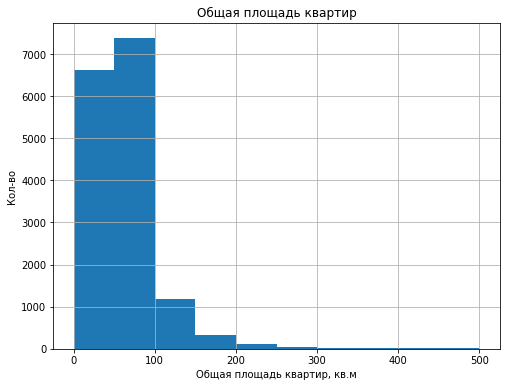

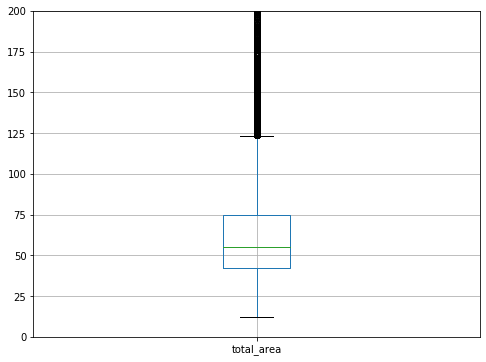

Квартира в Санкт-Петербурге? Нет


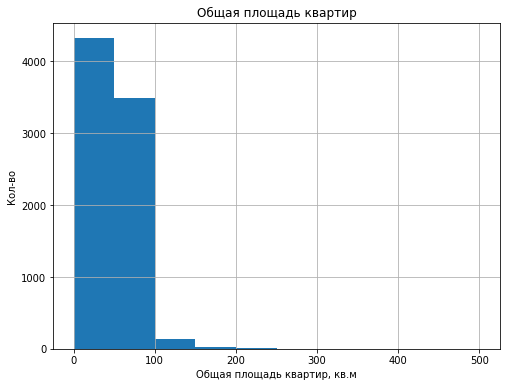

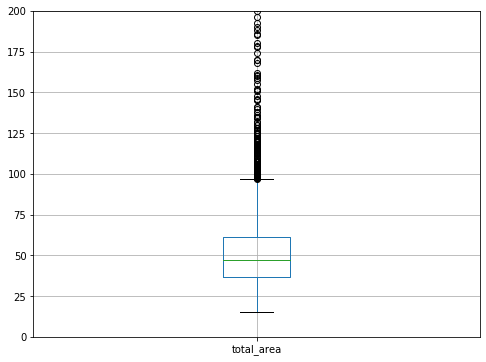

In [70]:
#построим гистограмму и диаграмму размаха общей площади квартиры
for value in data['spb_f_t'].unique():
    print(f"Квартира в Санкт-Петербурге? {'Да' if value else 'Нет'}")
    data[data['spb_f_t'] == value]['total_area'].hist(figsize=(8,6), bins=10, range=(0,500))
    plt.title('Общая площадь квартир')
    plt.xlabel('Общая площадь квартир, кв.м')
    plt.ylabel('Кол-во')
    plt.show()
    ax = data[data['spb_f_t'] == value].boxplot('total_area', figsize=(8,6))
    ax.set_ylim(0,200)
    plt.show()

In [71]:
#рассчитаем медиану площади квартир по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"')['total_area'].median()

55.0

In [72]:
#рассчитаем медиану площади квартир по Ленинградской области
data.query('locality_name != "Санкт-Петербург"')['total_area'].median()

47.0

In [73]:
#рассчитаем соотношение выбросов в группе Санкт-Петербург
(data.query('locality_name == "Санкт-Петербург"')['total_area'] > 125).mean()

0.05591247376121112

In [74]:
#рассчитаем соотношение выбросов в группе Ленинградская область
(data.query('locality_name != "Санкт-Петербург"')['total_area'] > 98).mean()

0.022812735021308598

  Итак, что можем сказать об общей площади:
  Построенные гистограммы выглядят не очень информативно, поэтому построили диаграммы размаха, чтобы определиться с более популярными значениями, выбросами и т.д. по данному параметру в разбивке по группам:
- Санкт-Петербург:
Большая часть значений попадает в промежуток от примерно квартиры с общей площадью от 40 до 75 кв.м. А вообщем площадь квартир от 12 до 125 (средним значением по площади будем считать медиану, которая равна 55 кв.м). В базе данных так же попадаются квартиры с площадью более 125 кв.м., они составляют примерно 1% от всех квартир по Санкт-Петербургу.
- Ленинградская область:
По аналогии: большая часть значений попадает в промежуток от примерно квартиры с общей площадью от 35 до 65 кв.м. А вообщем площадь квартир от 18 до 98 (средним значением по площади будем считать медиану, которая равна 47 кв.м). В базе данных так же попадаются квартиры с площадью более 98 кв.м., но их процент от всех квартир по Ленинградской области маленький - 0,2%.


4.1.2. Изучим цены на квартиры в разбивке по группам

Квартира в Санкт-Петербурге? Да


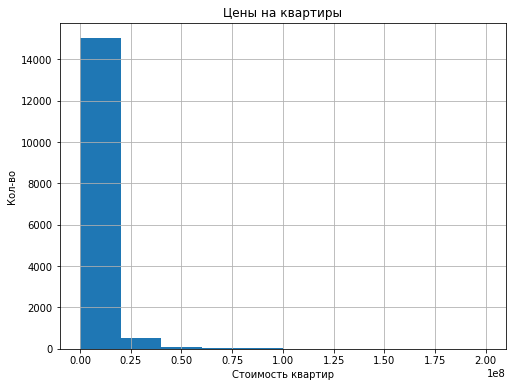

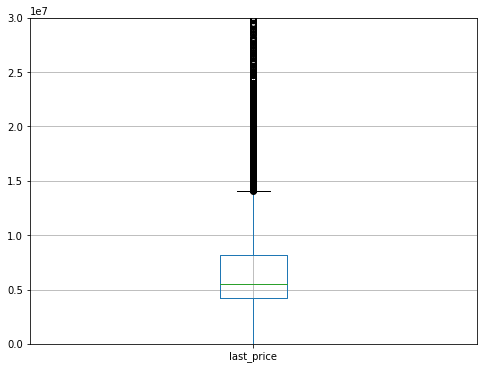

Квартира в Санкт-Петербурге? Нет


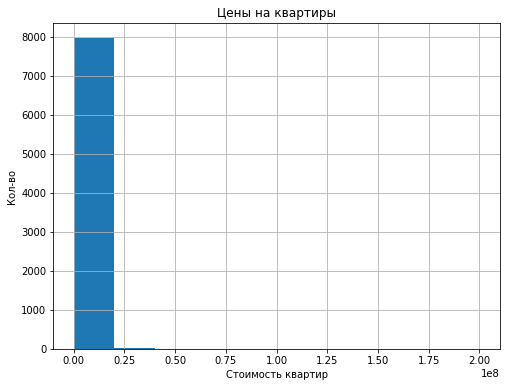

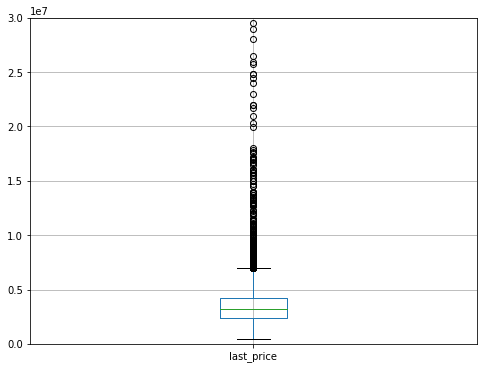

In [75]:
#построим гистограмму и диаграмму размаха цен на квартиры
for value in data['spb_f_t'].unique():
    print(f"Квартира в Санкт-Петербурге? {'Да' if value else 'Нет'}")
    data[data['spb_f_t'] == value]['last_price'].hist(figsize=(8,6), bins=10, range=(0,200000000))
    plt.title('Цены на квартиры')
    plt.xlabel('Стоимость квартир')
    plt.ylabel('Кол-во')
    plt.show()
    ax = data[data['spb_f_t'] == value].boxplot('last_price', figsize=(8,6))
    ax.set_ylim(0,30000000)
    plt.show()

In [76]:
#рассчитаем медиану цен на квартиры по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"')['last_price'].median()

5500000.0

In [77]:
#рассчитаем медиану цена на квартиры по Ленинградской области
data.query('locality_name != "Санкт-Петербург"')['last_price'].median()

3200000.0

In [78]:
#рассчитаем соотношение выбросов в группе Санкт-Петербург
(data.query('locality_name == "Санкт-Петербург"')['last_price'] > 14_000_000 ).mean()

0.08568157241905731

In [79]:
#рассчитаем соотношение выбросов в группе Ленинградская область
(data.query('locality_name != "Санкт-Петербург"')['last_price'] > 7_000_000).mean()

0.0416144397092003

Итак, о ценах на квартиры: Построенные гистограммы выглядят так же не очень информативно, поэтому анализируем по диаграммам размаха:

- Санкт-Петербург: Большая часть цен на квартиры попадает в промежуток от примерно от 4 до 8 млн руб. Вообщем цены на квартиры колеблються  до 14 млн руб (в среднем 5,5 млн руб). В базе данных так же попадаются квартиры с стоимостью более 14 млн руб., они составляют 1% от всех квартир по Санкт-Петербургу.
- Ленинградская область: По аналогии: большая часть значений попадает в промежуток от 2,5 до 4 млн руб. Вообщем от 1 до 7 млн руб  (в среднем 3,2 млн руб). В базе данных так же попадаются квартиры стоимостью более 7 млн руб, но они составляют менее 1% от всех квартир по Ленинградской области.


4.1.3. Изучим число комнат в квартирах в разбивке по группам

Квартира в Санкт-Петербурге? Да


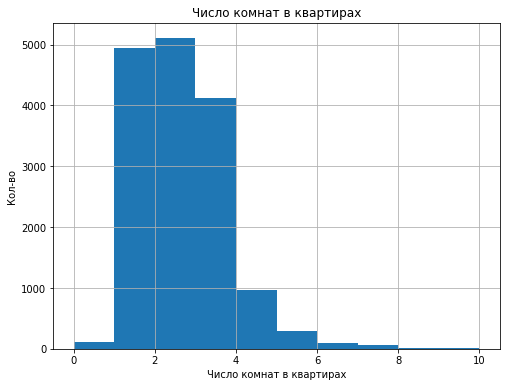

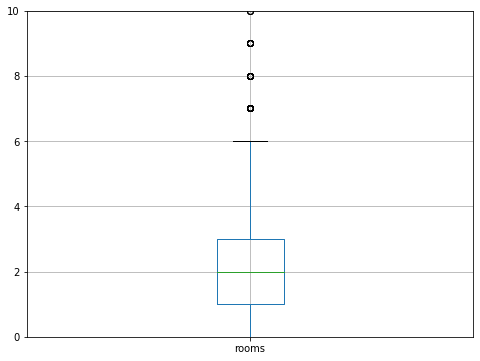

Квартира в Санкт-Петербурге? Нет


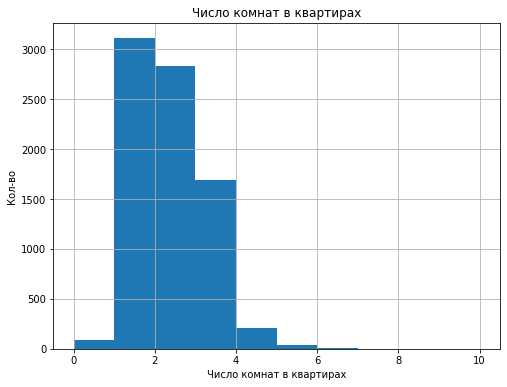

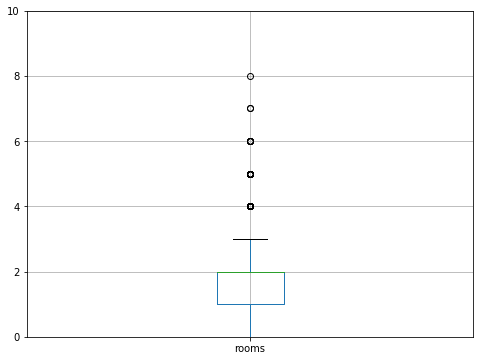

In [80]:
#построим гистограмму и диаграмму размаха числа комнат 
for value in data['spb_f_t'].unique():
    print(f"Квартира в Санкт-Петербурге? {'Да' if value else 'Нет'}")
    data[data['spb_f_t'] == value]['rooms'].hist(figsize=(8,6), bins=10, range=(0,10))
    plt.title('Число комнат в квартирах')
    plt.xlabel('Число комнат в квартирах')
    plt.ylabel('Кол-во')
    plt.show()
    ax = data[data['spb_f_t'] == value].boxplot('rooms', figsize=(8,6))
    ax.set_ylim(0,10)
    plt.show()

In [81]:
#рассчитаем медиану цен на квартиры по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"')['rooms'].median()

2.0

In [82]:
#рассчитаем медиану цена на квартиры по Ленинградской области
data.query('locality_name != "Санкт-Петербург"')['rooms'].median()

2.0

In [83]:
#рассчитаем соотношение выбросов в группе Санкт-Петербург
(data.query('locality_name == "Санкт-Петербург"')['rooms'] > 6 ).mean()

0.005533999109471408

In [84]:
#рассчитаем соотношение выбросов в группе Ленинградская область
(data.query('locality_name != "Санкт-Петербург"')['rooms'] > 3).mean()

0.03208824266733517

Итак, о количестве комнат в квартирах:

- Санкт-Петербург: В основном это квартиры 1-3 -х комнатные. А вообщем по городу 1-6 -ти комнатные квартиры (в среднем это есть 2-х комнатная квартира). В базе данных так же встречаются квартиры с количеством комнат более 6, но они составляют менее 1% от всех квартир по Санкт-Петербургу.
- Ленинградская область: По аналогии: В основном это квартиры 1-2 -х комнатные. А вообщем по области 1-3 -х комнатные квартиры (в среднем это есть 2-х комнатная квартира). В базе данных так же встречаются квартиры с количеством комнат более 3, но они составляют менее 1% от всех квартир по Ленинградской области.

4.1.4. Изучим высоту потолков в квартирах в разбивке по группам

Квартира в Санкт-Петербурге? Да


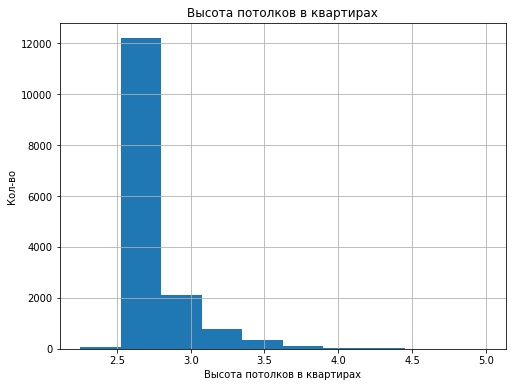

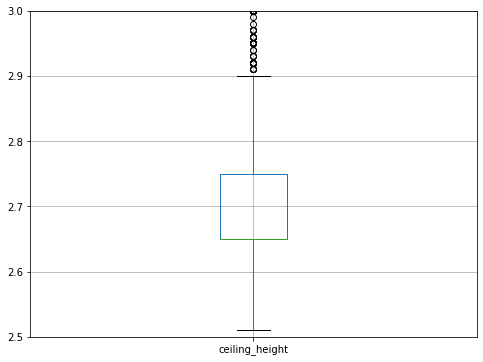

Квартира в Санкт-Петербурге? Нет


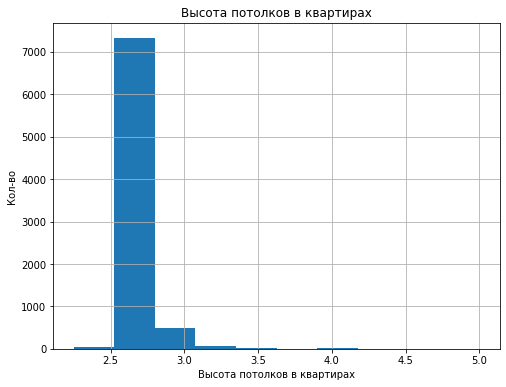

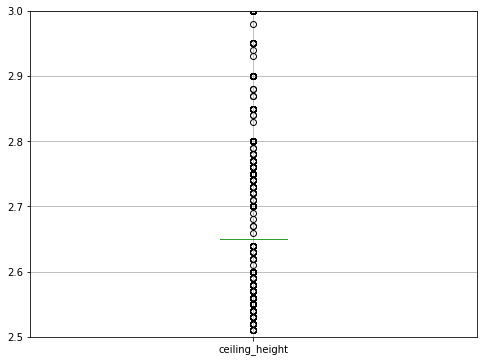

In [85]:
#построим гистограмму и диаграмму размаха высоты потолков комнат 
for value in data['spb_f_t'].unique():
    print(f"Квартира в Санкт-Петербурге? {'Да' if value else 'Нет'}")
    data[data['spb_f_t'] == value]['ceiling_height'].hist(figsize=(8,6), bins=10, range=(2.25,5))
    plt.title('Высота потолков в квартирах')
    plt.xlabel('Высота потолков в квартирах')
    plt.ylabel('Кол-во')
    plt.show()
    ax = data[data['spb_f_t'] == value].boxplot('ceiling_height', figsize=(8,6))
    ax.set_ylim(2.5,3)
    plt.show()

In [86]:
#рассчитаем медиану высоты потолков в квартирах по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median()

2.65

In [87]:
#рассчитаем медиану высоты потолков в квартирах по Ленинградской области
data.query('locality_name != "Санкт-Петербург"')['ceiling_height'].median()

2.65

In [88]:
#рассчитаем соотношение выбросов в группе Санкт-Петербург
(data.query('locality_name == "Санкт-Петербург"')['ceiling_height'] > 3 ).mean()

0.08905285923287323

In [89]:
#рассчитаем соотношение выбросов в группе Ленинградская область
(data.query('locality_name != "Санкт-Петербург"')['ceiling_height'] > 3).mean()

0.016044121333667585

Итак, о высоте потолков:

- Санкт-Петербург: В основном это квартиры с высотой потолков от 2,65 - 2,75 м. А вообщем по городу от 2,6 до 3 м (в среднем квартиры имеют высоту потолка 2,65 м). В базе данных так же встречаются квартиры с высотой потолков более 3м, но они составляют менее 1% от всех квартир по Санкт-Петербургу.
- Ленинградская область: В основном это квартиры с высотой потолков - 2,65 м. В стречаются тквартиры с высотой потолков более 3м, но они составляют менее 1% от всех квартир по Ленинградской области.

  То есть высота потолков - параметр, который не особо меняется от местоположения квартиры и он не подвержен колебаниям, в принципе. 

   Изучив данные параметров: площадь, цена, число комнат, высота потолков в разбивке по Санкт-Петербургу и Ленинградской области, можно сделать вывод, что данные похожи на правдоподобные.

4.2.

Изучим время продажи квартиры так же в разбивке по группам: Санкт-Петербург и Ленинградская область. 

Построим гистограмму. 

Посчитаем среднее и медиану. 

Сделаем вывод: сколько обычно занимает продажа квартиры и когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Квартира в Санкт-Петербурге? Да


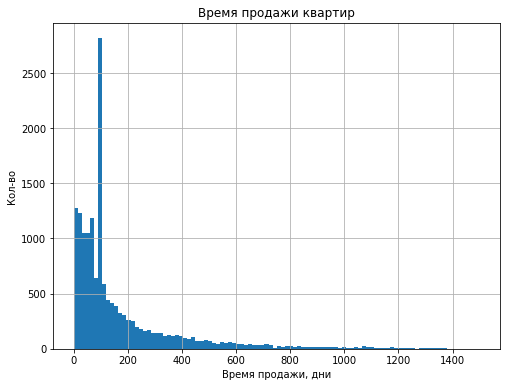

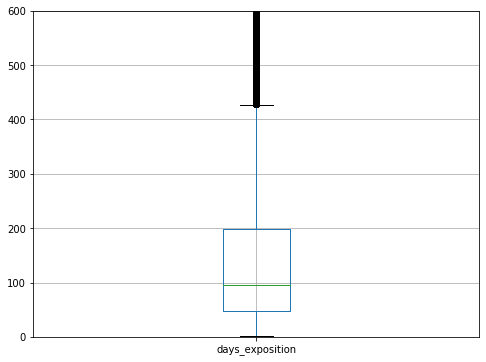

Квартира в Санкт-Петербурге? Нет


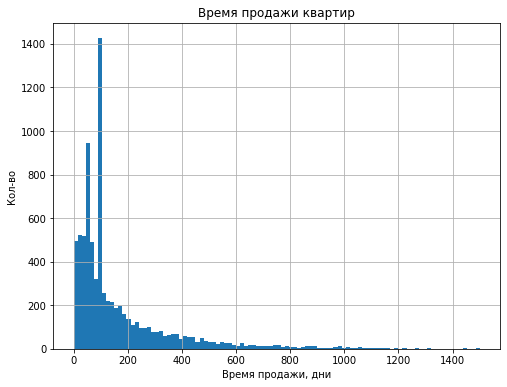

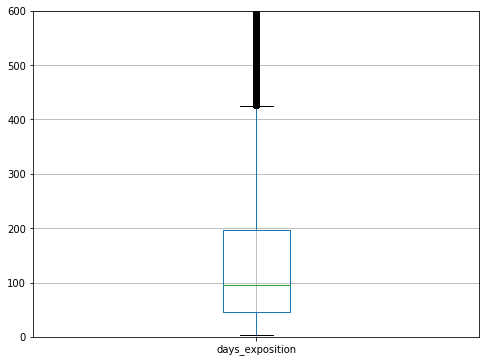

In [90]:
#построим гистограмму времени продажи квартир и диаграмму размаха 
for value in data['spb_f_t'].unique():
    print(f"Квартира в Санкт-Петербурге? {'Да' if value else 'Нет'}")
    data[data['spb_f_t'] == value]['days_exposition'].hist(figsize=(8,6), bins=100, range=(0,1500))
    plt.title('Время продажи квартир')
    plt.xlabel('Время продажи, дни')
    plt.ylabel('Кол-во')
    plt.show()
    ax = data[data['spb_f_t'] == value].boxplot('days_exposition', figsize=(8,6))
    ax.set_ylim(0,600)
    plt.show()

In [91]:
#рассчитаем медиану времени продажи квартир по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"')['days_exposition'].median()

95.0

In [92]:
#рассчитаем среднее времени продажи квартир по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"')['days_exposition'].mean()

171.15991349150818

In [93]:
#рассчитаем медиану высоты потолков в квартирах по Ленинградской области
data.query('locality_name != "Санкт-Петербург"')['days_exposition'].median()

95.0

In [94]:
#рассчитаем среднее времени продажи квартир  по Ленинградской области
data.query('locality_name != "Санкт-Петербург"')['days_exposition'].mean()

165.81386312358987

In [95]:
#рассчитаем соотношение "долгопродаваемых" квартир в группе Санкт-Петербург
(data.query('locality_name == "Санкт-Петербург"')['days_exposition'] > 425 ).mean()

0.10323770752496661

In [96]:
#рассчитаем соотношение "быстропродаваемых" квартир в группе Санкт-Петербург
(data.query('locality_name == "Санкт-Петербург"')['days_exposition'] < 40 ).mean()

0.20653902423509954

In [97]:
#рассчитаем соотношение "долгопродаваемых" квартир в группе Ленинградская область
(data.query('locality_name != "Санкт-Петербург"')['days_exposition'] > 425).mean()

0.09375783404361995

In [98]:
#рассчитаем соотношение "быстропродаваемых" квартир в группе Ленинградская область
(data.query('locality_name != "Санкт-Петербург"')['days_exposition'] < 40).mean()

0.16507896715968914

Итак, о сроках продажи квартир:

- Санкт-Петербург: В основном квартиры продаются от 1,5 до 6,5 месяцев. А вообщем по городу срок продажи квартиры до 1 года 2 месяцев (в среднем квартиры квартиры продаются за 4 месяца). В базе данных встречаются квартиры с продажей более 1 года 2 месяцев  - таких квартир с необычно долгой продажей примерно 1% от всех продаж квартир по Санкт-Петербургу. Процент "быстропродаваемых" квартир (менее 40 дней) составляет - 2%.
- Ленинградская область (по аналогии): В основном квартиры продаются от 1,5 до 6,5 месяцев. А вообщем по городу срок продажи квартиры до 1 года 2 месяцев (в среднем квартиры квартиры продаются за 4 месяца). В базе данных встречаются квартиры с продажей более 1 года 2 месяцев  - таких квартир с необычно долгой продажей примерно 1% от всех продаж квартир по Санкт-Петербургу. Процент "быстропродаваемых" квартир составляет - 2%.

  То есть сроки продажи квартир по Санкт-Петербургу и Ленинградской области, если и отличаются, то не на много и можно считать, что срок продажи не зависит от местоположения квартиры. 

4.3. ЗАВИСИМОСТЬ СТОИМОСТИ КВАРТИРЫ.

В этом пукте рассмотрим следующие вопросы:

    1. Какие факторы больше всего влияют на стоимость квартиры?

    2. Зависит ли цена от площади, числа комнат, удалённости от центра. 

    3. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

    4. Также изучим зависимость от даты размещения: дня недели, месяца и года.

4.3.1. Зависимость цены.

In [99]:
#построим матрицу корреляции для данных по Санкт-Петербургу
data.query('locality_name == "Санкт-Петербург"').corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,"liv_total_area,%","kitch_total_area,%",week_day,year,month,spb_f_t
total_images,1.00,0.10,0.10,0.08,0.02,0.02,0.09,0.04,0.05,-0.02,-0.01,0.10,0.14,0.01,-0.01,0.02,-0.02,-0.01,-0.01,-0.05,0.12,-0.03,-0.03,-0.01,0.15,0.00,nan
last_price,0.10,1.00,0.66,0.37,0.09,-0.06,0.54,-0.00,0.00,-0.03,-0.00,0.44,0.03,-0.01,-0.26,0.16,-0.02,0.17,-0.09,0.07,0.76,-0.07,-0.13,0.01,-0.04,0.00,nan
total_area,0.10,0.66,1.00,0.76,0.13,-0.11,0.87,-0.04,-0.00,-0.06,-0.02,0.58,0.03,-0.02,-0.34,0.18,-0.03,0.18,-0.11,0.13,0.29,-0.04,-0.37,-0.00,-0.09,0.00,nan
rooms,0.08,0.37,0.76,1.00,0.09,-0.26,0.81,-0.16,-0.00,-0.14,-0.07,0.28,-0.00,-0.05,-0.29,0.15,-0.07,0.10,-0.07,0.11,0.04,0.25,-0.60,-0.01,-0.06,-0.01,nan
ceiling_height,0.02,0.09,0.13,0.09,1.00,-0.07,0.13,-0.04,-0.03,0.00,-0.00,0.09,0.03,-0.03,-0.15,0.08,-0.03,0.07,-0.05,0.03,0.08,0.01,-0.03,-0.02,0.00,-0.01,nan
floors_total,0.02,-0.06,-0.11,-0.26,-0.07,1.00,-0.20,0.65,0.00,0.06,0.04,0.10,0.24,0.11,0.36,-0.25,0.08,-0.10,0.02,-0.04,0.01,-0.28,0.31,0.02,0.02,0.01,nan
living_area,0.09,0.54,0.87,0.81,0.13,-0.20,1.00,-0.10,-0.01,-0.05,-0.02,0.43,0.00,-0.04,-0.34,0.19,-0.06,0.15,-0.09,0.13,0.21,0.32,-0.45,-0.01,-0.08,-0.00,nan
floor,0.04,-0.00,-0.04,-0.16,-0.04,0.65,-0.10,1.00,-0.00,0.03,0.04,0.09,0.19,0.07,0.23,-0.15,0.07,-0.06,0.02,-0.03,0.05,-0.19,0.20,0.02,0.01,0.01,nan
is_apartment,0.05,0.00,-0.00,-0.00,-0.03,0.00,-0.01,-0.00,1.00,0.01,-0.00,-0.00,-0.02,0.01,0.02,-0.01,-0.02,-0.01,0.02,-0.08,0.01,-0.01,0.01,-0.00,0.23,0.11,nan
studio,-0.02,-0.03,-0.06,-0.14,0.00,0.06,-0.05,0.03,0.01,1.00,-0.00,-0.01,0.04,-0.02,0.02,-0.03,0.01,0.00,0.00,-0.02,0.01,0.09,0.17,0.00,0.01,0.01,nan


In [100]:
#построим матрицу корреляции для данных по Ленинградской области
data.query('locality_name != "Санкт-Петербург"').corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,"liv_total_area,%","kitch_total_area,%",week_day,year,month,spb_f_t
total_images,1.00,0.16,0.13,0.12,0.01,-0.05,0.12,-0.01,0.03,-0.04,-0.04,0.07,0.09,-0.02,0.01,0.00,0.03,-0.00,0.02,-0.03,0.08,-0.02,-0.07,-0.02,0.13,0.01,nan
last_price,0.16,1.00,0.72,0.41,0.02,0.14,0.56,0.11,-0.04,-0.05,-0.03,0.55,0.13,-0.01,-0.04,0.14,-0.01,0.10,-0.02,0.04,0.60,-0.13,-0.11,-0.02,-0.05,0.01,nan
total_area,0.13,0.72,1.00,0.78,0.03,-0.10,0.86,-0.07,-0.03,-0.11,-0.07,0.47,0.13,-0.03,0.01,0.05,0.03,0.05,0.04,0.06,-0.04,0.00,-0.44,-0.00,-0.05,0.01,nan
rooms,0.12,0.41,0.78,1.00,0.01,-0.24,0.83,-0.19,-0.02,-0.18,-0.12,0.10,0.07,-0.05,0.10,0.05,0.03,0.04,0.07,0.06,-0.23,0.29,-0.67,0.01,-0.03,0.00,nan
ceiling_height,0.01,0.02,0.03,0.01,1.00,-0.02,0.04,-0.01,-0.05,-0.00,0.05,0.02,0.03,0.03,0.05,0.06,-0.02,0.06,-0.07,-0.00,0.01,0.02,-0.00,-0.01,0.01,0.00,nan
floors_total,-0.05,0.14,-0.10,-0.24,-0.02,1.00,-0.20,0.72,-0.02,0.09,0.07,0.26,0.13,0.18,-0.50,-0.32,0.12,-0.23,0.16,-0.05,0.42,-0.27,0.42,-0.00,-0.01,0.03,nan
living_area,0.12,0.56,0.86,0.83,0.04,-0.20,1.00,-0.16,-0.02,-0.07,-0.05,0.24,0.08,-0.06,0.07,0.09,0.01,0.08,0.03,0.06,-0.13,0.44,-0.57,-0.00,-0.05,0.00,nan
floor,-0.01,0.11,-0.07,-0.19,-0.01,0.72,-0.16,1.00,-0.01,0.06,0.04,0.19,0.13,0.13,-0.38,-0.24,0.03,-0.18,0.09,-0.04,0.32,-0.21,0.31,-0.00,-0.00,0.04,nan
is_apartment,0.03,-0.04,-0.03,-0.02,-0.05,-0.02,-0.02,-0.01,1.00,-0.01,0.01,-0.04,-0.04,0.01,-0.00,0.06,-0.01,0.02,0.00,-0.04,-0.02,0.02,-0.00,0.03,0.20,0.12,nan
studio,-0.04,-0.05,-0.11,-0.18,-0.00,0.09,-0.07,0.06,-0.01,1.00,-0.01,-0.01,0.03,-0.01,-0.04,-0.03,nan,-0.01,0.00,-0.02,0.07,0.12,0.20,-0.01,0.01,-0.01,nan


   Из матрицы корреляции видим, что на стоимость кваритры больше всего влияет площадь квартиры: общая и жилая.

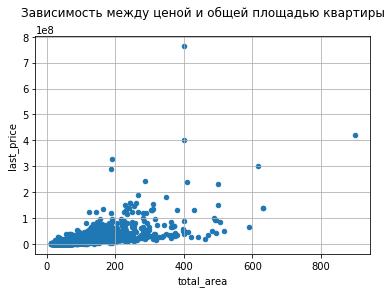

In [101]:
#построим диаграмму зависимости цены от площади
data.plot(x='total_area', y='last_price', kind='scatter', grid=True) 
_= plt.title('Зависимость между ценой и общей площадью квартиры', pad =20)


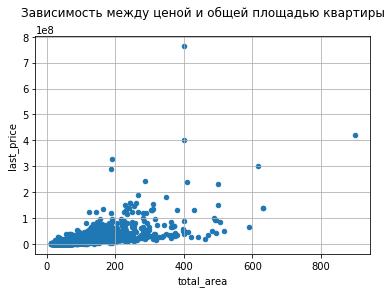

In [102]:
#построим диаграмму зависимости цены от площади
data.plot(x='total_area', y='last_price', kind='scatter', grid=True)
_ = plt.title('Зависимость между ценой и общей площадью квартиры', pad =20)


Из диаграммы можно сделать вывод: чем больше площадь - тем выше стоимость квартиры.

4.3.2. Зависимость цены квартиры от параметров:
       
       - число комнат 
       - удаленности от центра

Изучим зависимости в разбивке по группам: Санкт_Петербург и Ленинградская область, так как цены на недвижимость в них очень отличаются. 

САНКТ-ПЕТЕРБУРГ

,last_price
rooms,
0,"3,300,000.00"
1,"4,100,000.00"
2,"5,650,000.00"
3,"7,200,000.00"
4,"10,050,000.00"
5,"14,700,000.00"
6,"19,000,000.00"
7,"24,900,000.00"
8,"22,190,000.00"


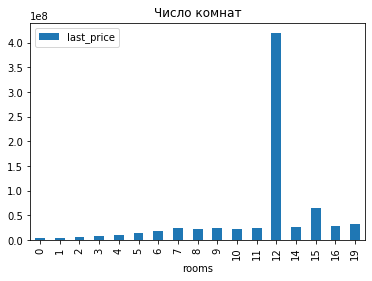

In [103]:
#построим сводную таблицу, по числу комнат и цены квартиры, и найдем в каждой группе медиану
price_group_rooms_spb = data.query('locality_name == "Санкт-Петербург"').\
pivot_table(index = 'rooms', values = 'last_price', aggfunc ='median')\
.sort_values( by='rooms')

display(price_group_rooms_spb)

#построим столбчатую диаграмму
price_group_rooms_spb.plot(y='last_price', kind='bar', title=('Число комнат'))

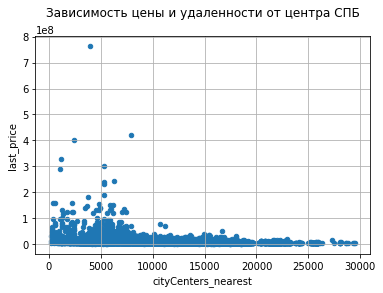

In [104]:
#построим диаграмму рассеянности зависимости цены и удаленности от центра
data.query('locality_name == "Санкт-Петербург"').plot(x='cityCenters_nearest', y='last_price', \
            kind='scatter', grid=True)
_ = plt.title('Зависимость цены и удаленности от центра СПБ', pad=20)



- Санкт-Петербург: 
    
    зависимость цены от количества комнат прослеживается, но неявно, поэтому нужно рассмотреть этот вопрос глубже, учитывая близость к центру;
    
    зависимость цены и удаленности от центра здесь очевидна, то есть чем ближе к центру - тем цена выше.

ЛЕНИНГРАДСКАЯ ОБЛАСТЬ

,last_price
rooms,
0,"2,300,000.00"
1,"2,800,000.00"
2,"3,300,000.00"
3,"4,250,000.00"
4,"4,799,000.00"
5,"5,900,000.00"
6,"14,250,000.00"
7,"24,950,000.00"
8,"36,900,000.00"


Text(0.5, 1.0, 'Зависимость цены от числа комнат')

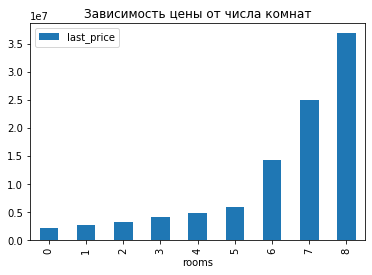

In [105]:
#построим сводную таблицу, по числу комнат и цены квартиры, и найдем в каждой группе медиану
price_group_rooms_spb = data.query('locality_name != "Санкт-Петербург"').\
pivot_table(index = 'rooms', values = 'last_price', aggfunc ='median')\
.sort_values( by='rooms')

display(price_group_rooms_spb)

#построим столбчатую диаграмму
price_group_rooms_spb.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от числа комнат')


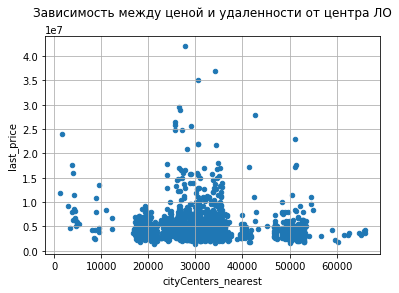

In [106]:
#построим диаграмму рассеянности зависимости цены и удаленности от центра
data.query('locality_name != "Санкт-Петербург"').plot(x='cityCenters_nearest', y='last_price', \
            kind='scatter', grid=True)
_ = plt.title( 'Зависимость между ценой и удаленности от центра ЛО', pad=20)



Ленинградская область: 

- зависимость цены от количества комнат  - здесь очевидна, поэтому можно сделать вывод, что чем больше число комнат, тем выше цена;
- зависимость цены и удаленности от центра Санкт-Петербурга - для Ленинградской области вопрос мало актуальный, поэтому он мало влияет на стоимость квартиры в населенных пунктах.

4.3.3. Зависимость цены (в разбивке по группам: Санкт-Петербург и Ленинградская область) и факта: на каком этаже расположена квартира: первом, последнем или другом. 

САНКТ-ПЕТЕРБУРГ

,last_price
group_floors,
другие,"5,600,000.00"
первый,"4,861,000.00"
последний,"5,650,000.00"


Text(0.5, 1.0, 'Зависимость цены от этажности квартиры')

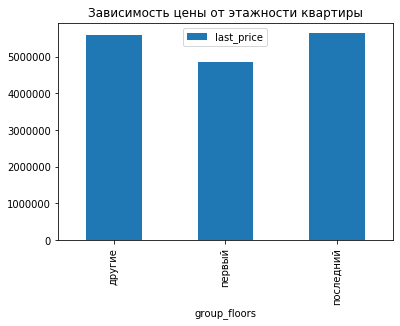

In [107]:
#построим сводную таблицу категории этажности и цены квартиры
price_group_floors = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'group_floors' , values = 'last_price', aggfunc ='median')
display(price_group_floors) 

#построим столбчатую диаграмму
price_group_floors.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от этажности квартиры')

    

ЛЕНИНГРАДСКАЯ ОБЛАСТЬ

,last_price
group_floors,
другие,"3,350,000.00"
первый,"2,750,000.00"
последний,"2,865,000.00"


Text(0.5, 1.0, 'Зависимость цены от этажности квартиры')

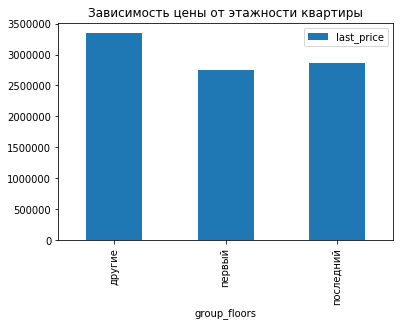

In [108]:
#построим сводную таблицу категории этажности и цены квартиры
price_group_floors = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'group_floors' , values = 'last_price', aggfunc ='median')
display(price_group_floors) 

#построим столбчатую диаграмму
price_group_floors.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от этажности квартиры')


Не зависимо от местоположения квартиры: Санкт-Петербург и Ленинградская область, явно прослеживается зависимость между этажностью квартиры и ценой:

первый этаж - дешевле всего; последний этаж - немного дороже, но основной промежуток цен на недвижимость попадает на "другие" этажи.


4.3.4. Зависимость цены квартиры (в разбивке от группы: Санкт-Петербург и Ленинградская область) от даты размещения: дня недели, месяца и года.

- зависимость цены от дня недели, когда было подано объявление

САНКТ-ПЕТЕРБУРГ

,last_price
week_day,
0,"5,500,000.00"
1,"5,500,000.00"
2,"5,500,000.00"
3,"5,685,000.00"
4,"5,500,000.00"
5,"5,500,000.00"
6,"5,400,000.00"


Text(0.5, 1.0, 'Зависимость цены от дня недели подачи объявления')

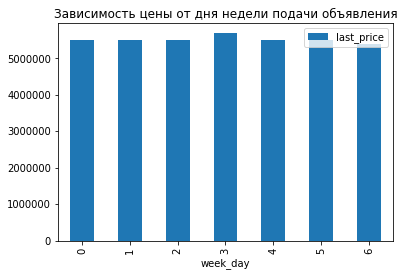

In [109]:
#построим сводную таблицу, по дня недели и цены квартиры, и найдем в каждой группе медиану
price_group_week_day_spb = data.query('locality_name == "Санкт-Петербург"').\
pivot_table(index = 'week_day', values = 'last_price', aggfunc ='median')\
.sort_values( by='week_day')

display(price_group_week_day_spb)

#построим столбчатую диаграмму
price_group_week_day_spb.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от дня недели подачи объявления')



ЛЕНИНГРАДСКАЯ ОБЛАСТЬ

,last_price
week_day,
0,"3,300,000.00"
1,"3,150,000.00"
2,"3,200,000.00"
3,"3,120,000.00"
4,"3,250,000.00"
5,"3,000,000.00"
6,"3,200,000.00"


Text(0.5, 1.0, 'Зависимость цены от дня недели подачи объявления')

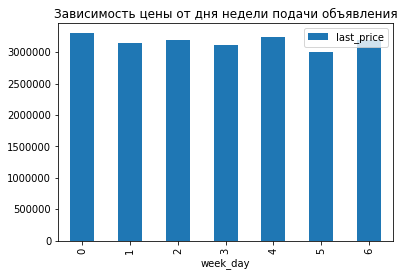

In [110]:
#построим сводную таблицу, дня недели и цены квартиры, и найдем в каждой группе медиану
price_group_week_day_lo = data.query('locality_name != "Санкт-Петербург"').\
pivot_table(index = 'week_day', values = 'last_price', aggfunc ='median')\
.sort_values( by='week_day')

display(price_group_week_day_lo)

#построим столбчатую диаграмму
price_group_week_day_lo.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от дня недели подачи объявления')


Согласно диаграммам, можно сделать вывод, что цена никак не зависит от дня недели, когда было подано объявление.

- зависимость цены от месяца, когда было размещено объявление о продаже квартиры

САНКТ-ПЕТЕРБУРГ

,last_price
month,
1,"5,700,000.00"
2,"5,500,000.00"
3,"5,600,000.00"
4,"5,565,000.00"
5,"5,500,000.00"
6,"5,321,997.00"
7,"5,400,000.00"
8,"5,500,000.00"
9,"5,600,000.00"


Text(0.5, 1.0, 'Зависимость цены от месяца подачи объявления')

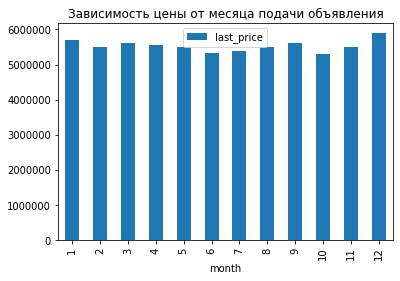

In [111]:
#построим сводную таблицу, месяца и цены квартиры, и найдем в каждой группе медиану
price_group_month_spb = data.query('locality_name == "Санкт-Петербург"').\
pivot_table(index = 'month', values = 'last_price', aggfunc ='median')\
.sort_values( by='month')

display(price_group_month_spb)

#построим столбчатую диаграмму
price_group_month_spb.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от месяца подачи объявления')


Цены на квартиры в Санктр-Петербурге не особо зависят от месяца подачи объявления, но заметны небольшое снижение в середине года и рост к концу года.

ЛЕНИНГРАДСКАЯ ОБЛАСТЬ

,last_price
month,
1,"3,250,000.00"
2,"3,100,000.00"
3,"3,150,000.00"
4,"3,200,000.00"
5,"3,200,000.00"
6,"3,100,000.00"
7,"3,120,000.00"
8,"3,190,000.00"
9,"3,165,000.00"


Text(0.5, 1.0, 'Зависимость цены от месяца подачи объявления')

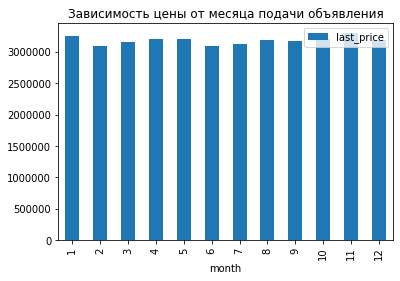

In [112]:
#построим сводную таблицу, месяца и цены квартиры, и найдем в каждой группе медиану
price_group_month_lo = data.query('locality_name != "Санкт-Петербург"').\
pivot_table(index = 'month', values = 'last_price', aggfunc ='median')\
.sort_values( by='month')

display(price_group_month_lo)

#построим столбчатую диаграмму
price_group_month_lo.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от месяца подачи объявления')

Можно сказать, что цены на квартиры в Ленинградской области не зависят от месяца подачи заявления, с незначительным снижением цен в феврале и в середине года.

- зависимость цены от года, когда было размещено объявление о продаже квартиры

САНКТ-ПЕТЕРБУРГ

,last_price
year,
2014,"10,600,000.00"
2015,"6,200,000.00"
2016,"5,450,000.00"
2017,"5,300,000.00"
2018,"5,490,000.00"
2019,"5,900,000.00"


Text(0.5, 1.0, 'Зависимость цены от года подачи объявления')

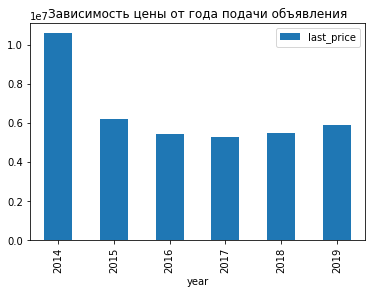

In [113]:
#построим сводную таблицу, года и цены квартиры, и найдем в каждой группе медиану
price_group_year_spb = data.query('locality_name == "Санкт-Петербург"').\
pivot_table(index = 'year', values = 'last_price', aggfunc ='median')\
.sort_values( by='year')

display(price_group_year_spb)

#построим столбчатую диаграмму
price_group_year_spb.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от года подачи объявления')

По диаграмме видно, что в Санкт-Петербурге за 5 лет (с 2014 по 2019гг.) цены на квартиры снизились более чем в 1,5 раза.

ЛЕНИНГРАДСКАЯ ОБЛАСТЬ

,last_price
year,
2014,"3,750,050.00"
2015,"3,457,500.00"
2016,"3,200,000.00"
2017,"3,150,000.00"
2018,"3,150,000.00"
2019,"3,200,000.00"


Text(0.5, 1.0, 'Зависимость цены от года подачи объявления')

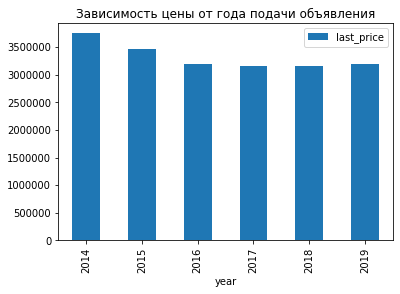

In [114]:
#построим сводную таблицу, года и цены квартиры, и найдем в каждой группе медиану
price_group_year_spb = data.query('locality_name != "Санкт-Петербург"').\
pivot_table(index = 'year', values = 'last_price', aggfunc ='median')\
.sort_values( by='year')

display(price_group_year_spb)

#построим столбчатую диаграмму
price_group_year_spb.plot(y='last_price', kind='bar')
plt.title('Зависимость цены от года подачи объявления')

По диаграмме в Ленинградской области так же заметно снижение цен на квартиры за 5 лет (2014 по 2019гг.), но незначительно, по сравнению с Санкт-Петербургом.

4.4. Изучение рынка недвижимости в топ-10 населенных пунктов Ленинградской области.

   В этом пункте перед нами стоит задача: среди топ-10 населенных пунктов Ленинградской области выделить: с самой высокой и самой низкой стоимостью жилья.

In [115]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%",week_day,year,month,spb_f_t
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,95,"120,370.37",другие,47.22,23.15,3,2019,3,True
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,nan,0,nan,81,"82,920.79",первый,46.04,27.23,1,2018,12,False
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558,"92,785.71",другие,61.25,14.82,3,2015,8,True
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,31.30,9,True,False,False,9.90,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424,"408,176.10",другие,19.69,6.23,4,2015,7,True
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121,"100,000.00",другие,32.00,41.00,1,2018,6,True


In [116]:
# составим сводную таблицу всех населенных пунктов и количества объявлений по ним
# сохраним в переменной data_lo_count
data_lo_count = data.query('locality_name != "Санкт-Петербург"').pivot_table(index = 'locality_name', \
values = 'price_sq_meter', aggfunc ='count')\

data_lo_count

,price_sq_meter
locality_name,
Бокситогорск,16
Волосово,36
Волхов,111
Всеволожск,398
Выборг,237
...,...
село Путилово,2
село Рождествено,3
село Русско-Высоцкое,9


In [117]:
#составим сводную таблицу всех начселенных пунктов и средней цены за кв.м. по ним
#сохраним в переменной data_lo_price_sq
data_lo_price_sq = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', \
values = 'price_sq_meter', aggfunc ='mean')

data_lo_price_sq

,price_sq_meter
locality_name,
Бокситогорск,"17,551.59"
Волосово,"40,183.33"
Волхов,"35,087.68"
Всеволожск,"68,654.47"
Выборг,"58,141.91"
...,...
село Путилово,"39,921.76"
село Рождествено,"37,733.16"
село Русско-Высоцкое,"54,833.73"


In [118]:
#объединим данные двух таблиц data_lo_count и data_lo_price_sq, 
#отсортируем итоговую таблицу по количеству объявлений 
#и найдем топ-10 самых популярных населенных пунктов
#сохраним в переменной data_lo_top
data_lo_top = data_lo_count.merge(data_lo_price_sq, on='locality_name', how='outer').\
sort_values( by='price_sq_meter_x', ascending=False).head(10)
data_lo_top

,price_sq_meter_x,price_sq_meter_y
locality_name,,
посёлок Мурино,522,"85,752.19"
посёлок Шушары,440,"78,677.36"
Всеволожск,398,"68,654.47"
Пушкин,369,"103,125.82"
Колпино,338,"75,424.58"
посёлок Парголово,327,"90,175.91"
Гатчина,307,"68,746.15"
деревня Кудрово,299,"92,473.55"
Выборг,237,"58,141.91"


In [119]:
#отсортируем топ-10 населенных пунктов по цене за квадратный метр
data_lo_top.sort_values( by='price_sq_meter_y', ascending=False)

,price_sq_meter_x,price_sq_meter_y
locality_name,,
Пушкин,369,"103,125.82"
деревня Кудрово,299,"92,473.55"
посёлок Парголово,327,"90,175.91"
посёлок Мурино,522,"85,752.19"
Петергоф,201,"84,757.56"
посёлок Шушары,440,"78,677.36"
Колпино,338,"75,424.58"
Гатчина,307,"68,746.15"
Всеволожск,398,"68,654.47"


Text(0.5, 1.0, 'Топ-10 населенных пунктов ЛО')

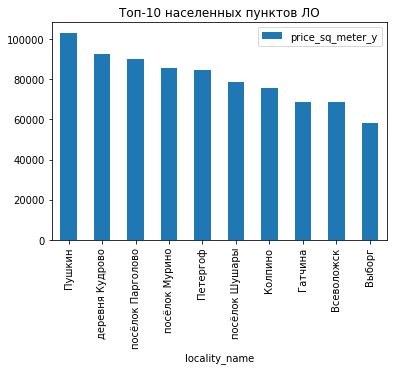

In [120]:
#построим столбчатую диаграмму топ-10 населенных пунктов
data_lo_top.sort_values( by='price_sq_meter_y', ascending=False).plot(y='price_sq_meter_y', kind='bar')
plt.title('Топ-10 населенных пунктов ЛО')

Итак, из анализа данных по Ленинградской области и по диаграмме наглядно видно, что самые дорогие квартиры в топ-10 населенных пунктов в Пушкине, а самые недорогие - в Выборге.

4.5. Анализ изменения цены по степени удалённости от центра.

В этом пункте мы проанализируем квартиры в Санкт-Петербурге ('locality_name'). 

Задача:

- выяснить, какая область входит в центр.  
- показывать, как цена зависит от удалённости от центра. 

In [121]:
#построим срез данных только по Санкт-Петербургу и сохраним его в переменной data_spb
data_spb = data.query('locality_name == "Санкт-Петербург"')


In [122]:
#переведем расстояние до центра города в километры
#и сохраним эти данные в новом столбце 'cityCenters_nearest_km'
data_spb['cityCenters_nearest_km'] = \
data_spb['cityCenters_nearest'].apply(lambda x: x/1000).round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'График зависимости стоимости 1 кв.м. от удаленности от центра')

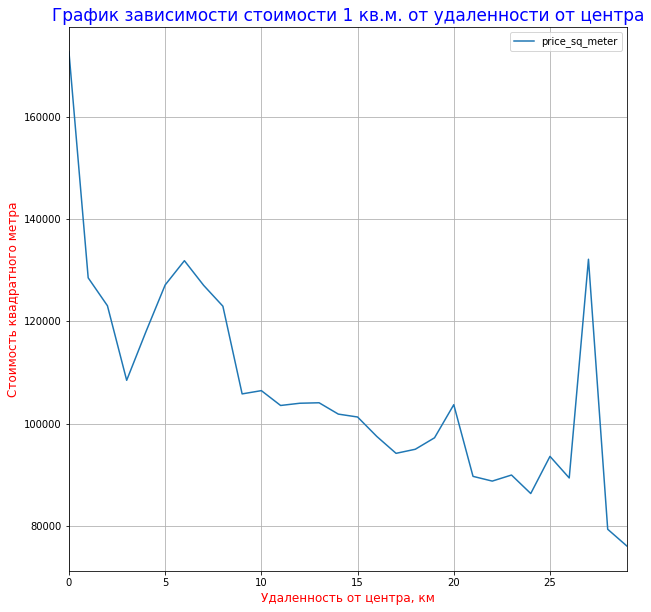

In [123]:
#построим сводную таблицу расстояния до центра и стоимости 1 кв.м. квартиры
#и тут же построим график зависимости этих величин
data_spb.pivot_table(index = 'cityCenters_nearest_km', \
values = 'price_sq_meter', aggfunc ='median').\
plot(grid=True, figsize=(10, 10))
plt.xlabel('Удаленность от центра, км', fontsize = 12, color = 'red')
plt.ylabel('Стоимость квадратного метра', fontsize = 12, color = 'red')
plt.title('График зависимости стоимости 1 кв.м. от удаленности от центра', fontsize = 17, color = 'blue')

   По данному пункту можно сделать вывод: существует явная зависимость цены квартиры в Санкт-Петербурге и близости ее к центру города - чем ближе, тем дороже. 

   Так же по графику зависимости стоимости квартиры и удаленности ее от центра, область радиусом примерно 3 км можно считать центром города.

4.6. Сравнение выводов по квартирам в центре Санкт-Петербурга.

В этом пункте необходимо: 

- выделить сегмент квартир в центре, т.е. удаленность до 3км 
- проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков 
- выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) 

In [124]:
#получим срез данных по Санкт-Петербургу, которые входят в область центра 
#и сохраним его в переменной data_spb_center
data_spb_center = data_spb.query('cityCenters_nearest_km < 3')
data_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,group_floors,"liv_total_area,%","kitch_total_area,%",week_day,year,month,spb_f_t,cityCenters_nearest_km
24,8,"6,500,000.00",97.20,2015-10-31,2,2.65,3,46.50,1,True,False,False,19.60,0,Санкт-Петербург,"20,052.00","2,336.00",3,411.00,3,124.00,265,"66,872.43",первый,47.84,20.16,5,2015,10,True,2.00
155,8,"96,000,000.00",317.00,2017-07-07,4,3.50,3,183.00,3,True,False,False,9.90,1,Санкт-Петербург,"22,673.00","1,771.00",2,508.00,3,366.00,62,"302,839.12",последний,57.73,3.12,4,2017,7,True,2.00
207,11,"9,000,000.00",72.60,2018-09-08,2,2.90,5,43.20,4,True,False,False,11.40,NaN,Санкт-Петербург,"22,794.00","1,645.00",2,276.00,3,485.00,95,"123,966.94",другие,59.50,15.70,5,2018,9,True,2.00
213,11,"8,700,000.00",111.40,2016-10-10,4,3.10,4,73.20,2,True,False,False,14.10,NaN,Санкт-Петербург,"20,936.00","1,218.00",1,463.00,3,55.00,791,"78,096.95",другие,65.71,12.66,0,2016,10,True,1.00
226,17,"7,950,000.00",86.40,2019-04-24,4,2.65,3,52.70,1,True,False,False,12.70,NaN,Санкт-Петербург,"31,729.00","2,468.00",0,nan,0,nan,95,"92,013.89",первый,61.00,14.70,2,2019,4,True,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,4,"40,000,000.00",188.00,2017-05-29,6,2.65,6,109.51,4,True,False,False,31.30,0,Санкт-Петербург,"23,390.00","2,254.00",2,425.00,1,62.00,30,"212,765.96",другие,58.25,16.65,0,2017,5,True,2.00
23399,16,"15,300,000.00",97.00,2017-01-11,3,3.50,7,61.40,2,True,False,False,9.50,NaN,Санкт-Петербург,"17,863.00","1,463.00",1,663.00,2,189.00,391,"157,731.96",другие,63.30,9.79,2,2017,1,True,1.00
23400,17,"30,000,000.00",213.00,2017-09-28,7,3.40,5,151.40,5,True,False,False,30.80,NaN,Санкт-Петербург,"21,146.00","1,225.00",2,342.00,3,30.00,299,"140,845.07",последний,71.08,14.46,3,2017,9,True,1.00
23602,0,"8,700,000.00",73.00,2019-01-23,3,2.65,4,31.30,4,True,False,False,9.90,NaN,Санкт-Петербург,"20,415.00","2,345.00",2,57.00,3,151.00,34,"119,178.08",последний,42.88,13.56,2,2019,1,True,2.00


4.6.1. Общая площадь квартир в центре Спб.

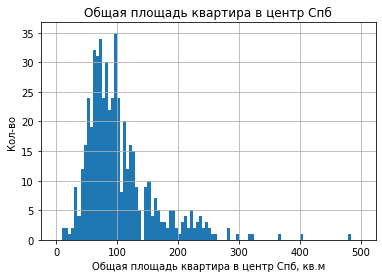

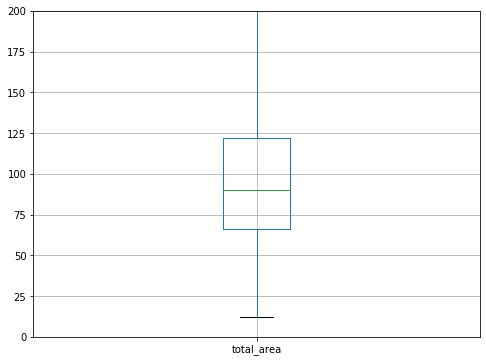

In [125]:
#построим гистограмму и диаграмму размаха общей площади квартир
data_spb_center['total_area'].\
plot(kind='hist', bins=100, range=(0,500), title = 'Общая площадь квартира в центр Спб', grid=True)
plt.xlabel('Общая площадь квартира в центр Спб, кв.м')
plt.ylabel('Кол-во')
plt.show()
ax = data_spb_center.boxplot('total_area', figsize=(8,6))
ax.set_ylim(0,200)
plt.show()

In [126]:
#найдем медиану общей площади квартир
data_spb_center['total_area'].median()

90.0

Вывод: площадь квартиры в центре Санкт-Петербурга отличается более чем в 1,5 раза от площади квартир в целом по городу. В основном площадь составляет от 70 до 120 кв.м и средняя площадь - 90 кв.м, а по городу в целом: от 40 до 75 кв.м и средняя - 55 кв.м.

4.6.2. Стоимость квартир в центре Спб.

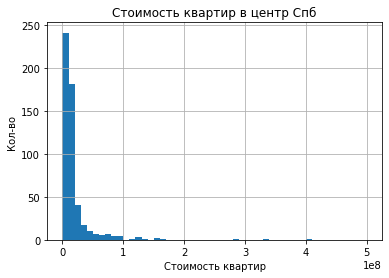

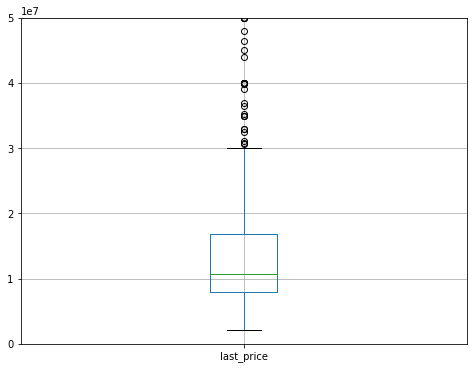

In [127]:
#построим гистограмму и диаграмму размаха стоимости квартир
data_spb_center['last_price'].\
plot(kind='hist', bins=50, range=(0,500_000_000), title = 'Стоимость квартир в центр Спб', grid=True)
plt.xlabel('Стоимость квартир')
plt.ylabel('Кол-во')
plt.show()
ax = data_spb_center.boxplot('last_price', figsize=(8,6))
ax.set_ylim(0,50_000_000)
plt.show()

In [128]:
#найдем медиану стоимости квартир
data_spb_center['last_price'].median()

10700000.0

Вывод: стоимость квартир в центре Санкт-Петербурга почти в 2 раза больше в среднем стоимости квартир в целом по городу. В основном цена квартиры в центре составляет от 7 до 16 млн.руб. и средняя стоимость - 11 млн.руб., а по городу в целом: от 4 до 8 млн.руб. и средняя - 5,5 млн.руб.

4.6.3. Число комнат в квартирах в центре Спб.

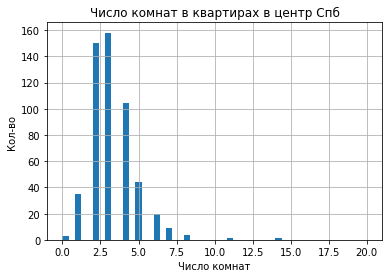

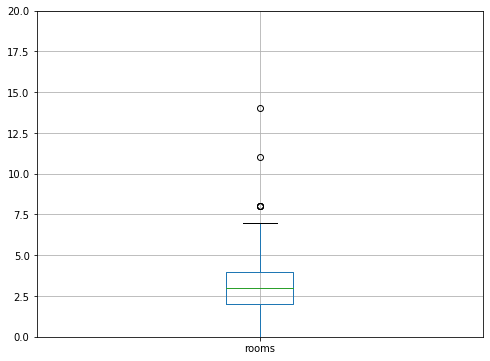

In [129]:
#построим гистограмму и диаграмму размаха числа комнат в квартире
data_spb_center['rooms'].\
plot(kind='hist', bins=50, range=(0,20), title = 'Число комнат в квартирах в центр Спб', grid=True)
plt.xlabel('Число комнат')
plt.ylabel('Кол-во')
plt.show()
ax = data_spb_center.boxplot('rooms', figsize=(8,6))
ax.set_ylim(0,20)
plt.show()

In [130]:
#найдем медиану числа комнат в квартирах
data_spb_center['rooms'].median()

3.0

Вывод: число комнат в квартирах в центре Санкт-Петербурга так же превышает число комнат в квартирах в целом по городу. В основном в центре города преобладают двух-четырехкомнатные квартиры, а по городу в целом: одно-двухкомнатные.

4.6.4. Высота потолков в квартирах в центре Спб.

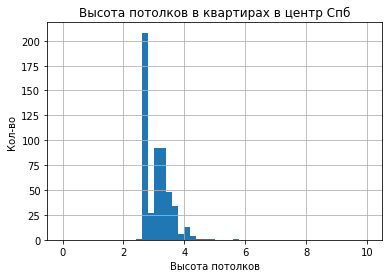

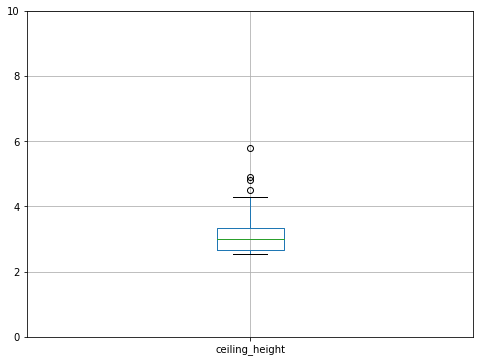

In [131]:
#построим гистограмму и диаграмму размаха высоты потолков в квартире
data_spb_center['ceiling_height'].\
plot(kind='hist', bins=50, range=(0,10), title = 'Высота потолков в квартирах в центр Спб', grid=True)
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во')
plt.show()
ax = data_spb_center.boxplot('ceiling_height', figsize=(8,6))
ax.set_ylim(0,10)
plt.show()

In [132]:
#найдем медиану высоты потолков
data_spb_center['ceiling_height'].median()

3.0

Вывод: квартир с высокими потолками в центре Санкт-Петербурга больше, чем таких квартир в целом по городу. В основном в центре города квартиры с высотой потолков от 2,65 до 3,5 м (средняя величина - 3 м), а по городу в целом: от 2,65 до 2,75м (средняя - 2,65м).

4.6.5. Зависимость стоимости квартир в центре Спб.

Проанализируем следующие вопросы:

- от чего зависит стоимость квартир в центре Спб     
- зависит ли цена от площади, числа комнат. 
- зависит ли цены от того: на каком этаже расположена квартира: первом, последнем или другом. 
- зависимосит ли  цена от даты размещения объявления: дня недели, месяца и года.

ЗАВИСИМОСТЬ ЦЕНЫ ОТ ОБЩАЯ ПЛОЩАДЬ КВАРТИРЫ

In [133]:
#построим матрицу корреляции данных квартир в центре
data_spb_center.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,"liv_total_area,%","kitch_total_area,%",week_day,year,month,spb_f_t,cityCenters_nearest_km
total_images,1.00,0.19,0.11,0.01,0.08,0.05,0.06,0.05,0.07,-0.08,-0.04,0.17,0.20,0.11,0.05,0.05,-0.05,-0.04,0.02,-0.05,0.20,-0.08,0.01,-0.03,0.19,-0.03,nan,0.03
last_price,0.19,1.00,0.57,0.22,0.09,0.28,0.47,0.29,-0.05,-0.03,-0.02,0.35,0.38,0.11,-0.07,0.07,0.00,-0.01,0.04,0.02,0.84,-0.06,-0.10,-0.02,-0.02,-0.04,nan,-0.09
total_area,0.11,0.57,1.00,0.72,0.11,0.15,0.91,0.23,-0.00,-0.06,-0.06,0.43,0.20,0.04,-0.05,0.11,-0.03,-0.03,0.07,0.06,0.23,-0.01,-0.34,-0.01,-0.09,-0.01,nan,-0.05
rooms,0.01,0.22,0.72,1.00,0.02,0.03,0.72,0.11,0.00,-0.13,-0.09,0.17,-0.03,-0.01,-0.03,0.07,-0.01,-0.02,0.02,0.09,-0.05,0.15,-0.46,-0.04,-0.09,-0.06,nan,-0.02
ceiling_height,0.08,0.09,0.11,0.02,1.00,0.05,0.13,0.01,-0.08,0.20,-0.04,0.13,-0.01,0.08,0.00,0.07,0.11,-0.05,-0.02,0.04,0.11,0.09,-0.03,-0.03,0.02,-0.01,nan,-0.03
floors_total,0.05,0.28,0.15,0.03,0.05,1.00,0.08,0.36,-0.07,-0.02,0.04,0.12,0.18,-0.03,0.09,0.04,-0.01,-0.05,0.08,0.08,0.27,-0.10,0.02,0.00,-0.05,-0.03,nan,0.05
living_area,0.06,0.47,0.91,0.72,0.13,0.08,1.00,0.17,-0.01,-0.03,-0.05,0.33,0.14,0.05,-0.05,0.12,-0.02,0.00,0.04,0.03,0.17,0.34,-0.39,0.00,-0.09,-0.00,nan,-0.04
floor,0.05,0.29,0.23,0.11,0.01,0.36,0.17,1.00,-0.04,-0.00,-0.06,0.19,0.26,-0.00,0.04,0.04,-0.05,-0.04,-0.01,0.07,0.21,-0.04,-0.05,0.05,-0.04,-0.01,nan,-0.01
is_apartment,0.07,-0.05,-0.00,0.00,-0.08,-0.07,-0.01,-0.04,1.00,0.02,0.02,0.04,0.04,0.06,0.02,0.06,-0.07,0.02,0.11,-0.11,-0.01,0.00,0.05,-0.06,0.24,0.10,nan,0.06
studio,-0.08,-0.03,-0.06,-0.13,0.20,-0.02,-0.03,-0.00,0.02,1.00,-0.00,-0.03,-0.04,-0.02,0.02,-0.04,-0.03,-0.05,0.02,-0.04,-0.02,0.11,0.07,0.05,0.02,0.01,nan,-0.00


Text(0.5, 1.0, 'График зависимости цены от общей площади квартиры')

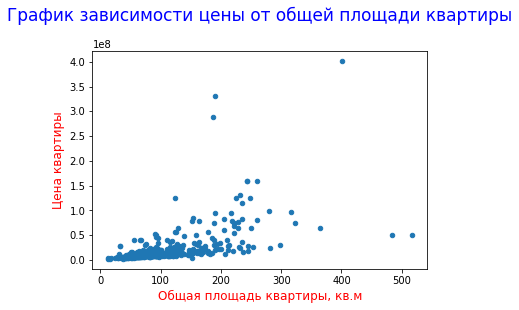

In [134]:
#построим диаграмму рассеяния зависимости цены квартиры от ее площади
data_spb_center.plot(x='total_area', y='last_price', kind='scatter')

plt.xlabel('Общая площадь квартиры, кв.м', fontsize = 12, color = 'red')
plt.ylabel('Цена квартиры', fontsize = 12, color = 'red')
plt.title('График зависимости цены от общей площади квартиры', fontsize = 17, color = 'blue', pad=30)



   По матрице корреляции и диаграмме рассеяния также как и в общем анализе данных, который был проведен нами ранее, прослеживается зависимость цены квартиры от ее площади: чем больше площадь  - тем дороже квартира.

ЗАВИСИМОСТЬ ЦЕНЫ ОТ ЧИСЛА КОМНАТ В КВАРТИРЕ

,last_price
rooms,
0,"3,200,000.00"
1,"5,700,000.00"
2,"8,725,000.00"
3,"10,000,000.00"
4,"12,500,000.00"
5,"17,000,000.00"
6,"19,500,000.00"
7,"30,600,000.00"
8,"20,095,000.00"


Text(0.5, 1.0, 'График зависимости цены от числа комнат в квартирах в центре Спб')

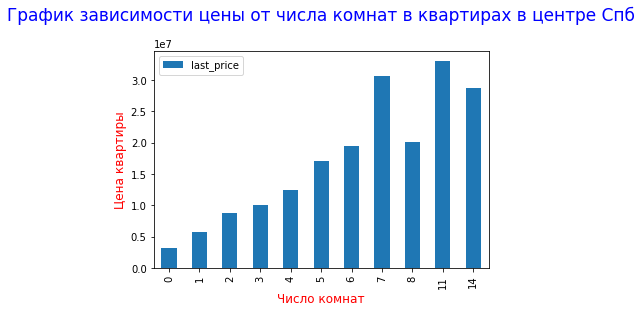

In [135]:
#построим сводную таблицу, по числу комнат и цены квартиры, и найдем в каждой группе медиану
price_group_rooms_spb_center = data_spb_center.\
pivot_table(index = 'rooms', values = 'last_price', aggfunc ='median')\
.sort_values( by='rooms')


display(price_group_rooms_spb_center)

#построим столбчатую диаграмму
price_group_rooms_spb_center.plot(y='last_price', kind='bar')
plt.xlabel('Число комнат', fontsize = 12, color = 'red')
plt.ylabel('Цена квартиры', fontsize = 12, color = 'red')
plt.title('График зависимости цены от числа комнат в квартирах в центре Спб', fontsize = 17, \
          color = 'blue', pad=30)


Вывод: Ранее анализируя данные зависимости цены квартиры от числа комнат, в целом по Санкт-Петербургу, мы не смогли определить явной зависмости и в выводе отмечали, что требуется категоризация данных по удаленности квартир от центра. Сейчас мы можем сказать, что зависимость очевидна: чем больше комнат в квартире - тем выше цена. Встречаются исключения, но их мы не будем учитывать в анализе.

ЗАВИСИМОСТЬ ЦЕНЫ ОТ КАТЕГОРИИ ЭТАЖНОСТИ КВАРТИРЫ

,last_price
group_floors,
другие,"11,969,500.00"
первый,"7,815,000.00"
последний,"10,200,000.00"


Text(0.5, 1.0, 'Зависимость цены от категории этажности квартир в центре СПб')

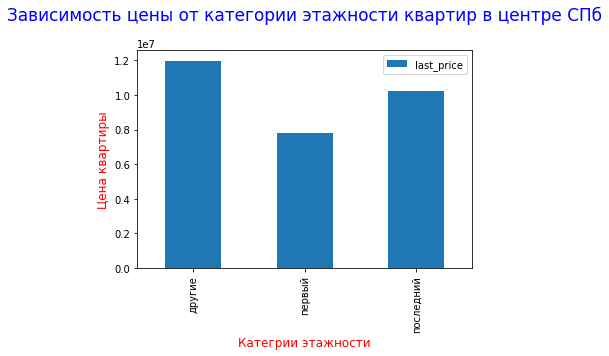

In [136]:
#построим сводную таблицу категории этажности и цены квартиры
price_group_floors_spb_center = data_spb_center.pivot_table(index = 'group_floors' , values = 'last_price', aggfunc ='median')
display(price_group_floors_spb_center) 

#построим столбчатую диаграмму
price_group_floors_spb_center.plot(y='last_price', kind='bar')
plt.xlabel('Категрии этажности', fontsize = 12, color = 'red')
plt.ylabel('Цена квартиры', fontsize = 12, color = 'red')
plt.title('Зависимость цены от категории этажности квартир в центре СПб', fontsize = 17, \
          color = 'blue', pad=30)

Вывод: аналогично анализу данных по городу Санкт-Петербургу в целом, так и по квартирам, расположенным в центре, видна явная зависимость цены от категории этажности квартир: первый этаж - самые недорогие, последний - чуть дороже, а основные цены попадают на квартиры категории "другие".

ЗАВИСИМОСТЬ ЦЕНЫ ОТ ДАТЫ РАЗМЕЩЕНИЯ ОБЪЯВЛЕНИЯ.

- от дня недели

,last_price
week_day,
0,"12,275,000.00"
1,"10,400,000.00"
2,"11,570,000.00"
3,"12,990,000.00"
4,"9,800,000.00"
5,"8,990,000.00"
6,"10,400,000.00"


Text(0.5, 1.0, 'Зависимость цены от дня недели подачи объявления о продаже квартир в центре СПб')

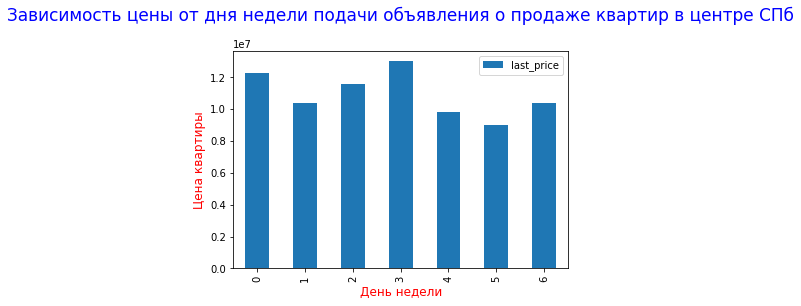

In [137]:
#построим сводную таблицу, по дня недели и цены квартиры, и найдем в каждой группе медиану
price_group_week_day_spb_center = data_spb_center.\
pivot_table(index = 'week_day', values = 'last_price', aggfunc ='median')\
.sort_values( by='week_day')

display(price_group_week_day_spb_center)

#построим столбчатую диаграмму
price_group_week_day_spb_center.plot(y='last_price', kind='bar')
plt.xlabel('День недели', fontsize = 12, color = 'red')
plt.ylabel('Цена квартиры', fontsize = 12, color = 'red')
plt.title('Зависимость цены от дня недели подачи объявления о продаже квартир в центре СПб', \
          fontsize = 17, color = 'blue', pad=30)


Вывод: ранее сделанный вывод о зависимости цены и дня недели, когда было размещено объявление о продаже квартиры, отличается по квартирам в центре СПб: квартиры, выставленные на продажу в середине недели - продаются по более высоким ценам. 

- от месяца

,last_price
month,
1,"13,090,000.00"
2,"10,700,000.00"
3,"10,950,000.00"
4,"11,749,000.00"
5,"10,100,000.00"
6,"9,375,000.00"
7,"9,850,000.00"
8,"11,650,000.00"
9,"10,500,000.00"


Text(0.5, 1.0, 'Зависимость цены от месяца подачи объявления о продаже квартир в центре СПб')

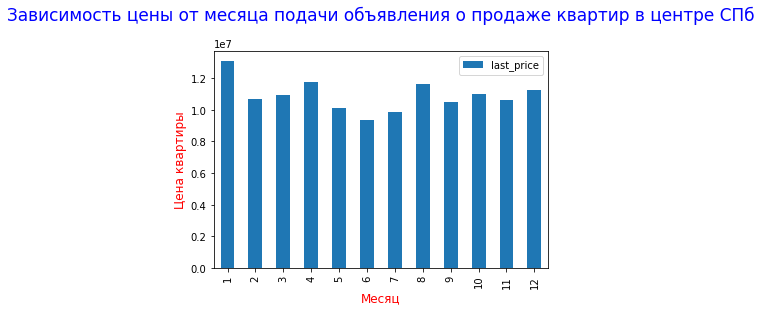

In [138]:
#построим сводную таблицу, месяца и цены квартиры, и найдем в каждой группе медиану
price_group_month_spb_center = data_spb_center.\
pivot_table(index = 'month', values = 'last_price', aggfunc ='median')\
.sort_values( by='month')

display(price_group_month_spb_center)

#построим столбчатую диаграмму
price_group_month_spb_center.plot(y='last_price', kind='bar')

plt.xlabel('Месяц', fontsize = 12, color = 'red')
plt.ylabel('Цена квартиры', fontsize = 12, color = 'red')
plt.title('Зависимость цены от месяца подачи объявления о продаже квартир в центре СПб', \
          fontsize = 17, color = 'blue', pad=30)


Вывод: Ранее в зависимости цены и месяца подачи объявления отмечалась тенденция: небольшое снижение в середине года и рост к концу года. По квартирам в центре СПб снижение цен в середине года так же прослеживается, но ,в отличии от города в целом, рост отмечается в самом начале года - январе.

- от года

,last_price
year,
2014,"55,712,036.00"
2015,"11,200,000.00"
2016,"11,300,000.00"
2017,"10,000,000.00"
2018,"10,100,000.00"
2019,"13,850,000.00"


Text(0.5, 1.0, 'Зависимость цены от года подачи объявления о продаже квартир в центре СПб')

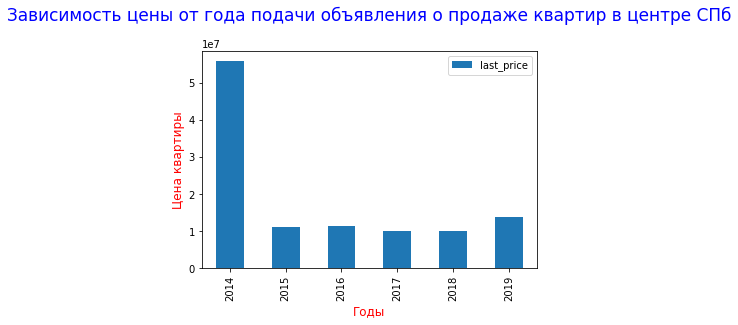

In [139]:
#построим сводную таблицу, года и цены квартиры, и найдем в каждой группе медиану
price_group_year_spb_center = data_spb_center.\
pivot_table(index = 'year', values = 'last_price', aggfunc ='median')\
.sort_values( by='year')

display(price_group_year_spb_center)

#построим столбчатую диаграмму
price_group_year_spb_center.plot(y='last_price', kind='bar')
plt.xlabel('Годы', fontsize = 12, color = 'red')
plt.ylabel('Цена квартиры', fontsize = 12, color = 'red')
plt.title('Зависимость цены от года подачи объявления о продаже квартир в центре СПб', 
          fontsize = 17, color = 'blue', pad=30)

Вывод: По данным за 5 лет (с 2014 по 2019гг.) цены на квартиры в целом по СПб снизились более чем в 1,5 раза, а по квартирам в центре СПб в этот период можно констатировать факт: в 2014г. цены резко упали почти в 5 раз и только в 2019г. стали немного расти.

## Общий вывод

I. 

1. На первый взгляд изучая таблицу данных  - архив объявлений о продаже квартир в Санкт-Петербурге (далее СПБ) и Ленинградской области (далее ЛО) возникли следующие вопросы:


- В столбце 'first_day_exposition' - дата публикации. Значение указали в часовом поясе UTC+0, в формате ISO. Значит, сначала идут год, месяц, день; затем буквенный разделитель даты и времени T; затем часы, минуты и секунды. 

- Остальные столбцы сомнений, на первый взгляд, не вызвали.


2. Далее, изучив общую информацию, сделали выводы:

- В таблице 22 столбца.

Согласно документации к данным: 
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении


- Количество значений во многих столбцах различается - значит, в данных есть пропущенные значения.

- Есть столбцы, тип которых не соответствует типу данных:
 
- balcony — число балконов исчисляется целыми числами, указан тип вещественных; 
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - значение должно быть целым, указан тип вещественный;
- first_day_exposition — дата публикации - указан тип object, должен быть тип дата;
- floors_total — всего этажей в доме - исчисляется целыми числами, указан тип вещественных;
- is_apartment — апартаменты (булев тип)- указан тип object;
- parks_around3000 — число парков в радиусе 3 км считают в целых числах, а указан вещественный тип;
- ponds_around3000 — число водоёмов в радиусе 3 км считают в целых числах, а указан вещественный тип;


3. Согласно информации некоторых числовых показателей таблицы:

- тоже подтверждается факт, что очень много столбцов с пропусками;

- вызвали подозрения некоторые параметры, которые требуют проверки, по следующим столбцам:
- airports_nearest - минимальное значение;
- ceiling_height - минимальное и максимальное значение;
- days_exposition - максимальное значение, а так же стандартное отклонение велико - могут быть аномальные значения или выбросы;
- floors_total - максимальное значение;
- kitchen_area - минимальное и максимальное значение;
- last_price - максимальное значение, а так же стандартное отклонение велико - могут быть аномальные значения или выбросы;
- living_area - минимальное и максимальное значение;
- parks_nearest - минимальное значение;
- rooms - минимальное и максимальное значение;
- total_area - максимальное значение.

II.


1. Проработали пропуски в следующих столбцах:

- Столбец ceiling_height - высота потолков (м), 39% пропусков. Пропусков больше, чем 15%, но так как высота потолков не очень часто варьирующаяся величина, посчитала, что их можно заменить медианным значением по столбцу. Медианным - чтобы избежать выбросов и аномальных значений. 
Сначала разобрались с минимальным и максимальным значением этого столбца, которые вызвали сомнения.

Тут видны явные ошибки в данных:
* высота потолка - 100 м - противоречит здравому смыслу;
* количество балконов - 5 - в одной комнатной квартире не может быть столько балконов
Заменили эти показатели на медианные значения по соответствующим столбцам.

Потолок с высотой ниже 2,5-х метров - абсурд, поэтому заменили эти значения медианой по столбцу 'ceiling_height'

Отработав аномально низкие и очень большие значения по столбцу 'ceiling_height' , после заменили пропуски по этому столбцу на медианное значение этого столбца.

- Столбец living_area - жилая площадь(кв.м), 8%. 

Заменили пропуски в столбце 'living_area' на медианное значение по группам: Санкт-Петербург и Ленинградская область. Но снача рассмотрели аномальные минимальное (2 кв.м.) и максимальное (409 кв.м.) значение по этому столбцу.

Максимально значение (409 кв.м.): Судя по количеству комнат и стоимости, такое большое значение жилой площади вполне возможно. Стало понятно большое максимальное значение по столбцу 'total_area' - 900 кв.м. Поэтому максимальное значение по столбцу 'living_area' - оставили без изменений.

Минимальное значение (2 кв.м.): Тут видна явная ошибка в заполнении столбца 'living_area', поэтому мы заменили аномально низкие значения, равные 2, на медианное значение, но медианное значение в зависимости от группы: Санкт_Петербург и Ленинградская область, так как считаю, что значения в этих группах по столбцу living_area будут сильно отличаться.

- Столбец is_apartment - апартаменты, 88%. Пропусков слишком много, чтобы их чем то заменить и это не повлияет на исходный результат. Скорее всего их просто не заполнили, где нет апартаментов или стали заполнять с какого то определенного момента.

- Столбец kitchen_area - площадь кухни (кв.м), 10%. Заменили пропуски в столбце 'kitchen_area' на медианное значение по группам: Санкт-Петербург и Ленинградская область. 
- Но сначала рассмотрели аномально минимальное (1,3 кв.м.) значение. Проанализировав данные в  других столбцах и  в строках стола видно, что общая площадь таких квартир тоже очень маленькая, поэтому возможно и площадь кухни не такая уж и аномально маленькая. Поэтому это значение оставили без изменени.
- С, на первый взгляд, аномально большим максимальным (112 кв.м.) значение по этому столбцу мы разобрались ранее - это кухня в огромной квартире в 900 кв.м.



- Столбец balcony - число балконов, 49%. Так же пропусков слишекм много, поэтому оставили как есть.

- Столбец days_exposition - сколько дней было размещено объявление, 13%. Заменили пропуски в столбце 'days_exposition' на медианное значение по столбцу.
Аномально большое максимальное значение по этому столбцу - 1580, то есть объявление подано больше, чем 4 года назад, решила оставить без изменений.

По ниже приведенным столбцам с большим количеством пропусков (более 15%), это столбцы которые отображают кадастровые данные жилых помещений, оставили пропуски как есть, так как не имею разумного решения по их замене, которая бы не исказила исходный результат.
* airports_nearest - расстояние до ближайшего аэропорта в метрах, 23%
* cityCenters_nearest - расстояние до центра города, 23%
* parks_around3000 - число парков, 23%
* parks_nearest - расстояние до ближайшего парка, 66%
* ponds_around3000 - число водоемов, 23%
* ponds_nearest - расстояние до ближайшего водоема, 62%.


Проанализировав данные по квартирам, где количество комнта (rooms) равно 0, решила заменить эти значения на 1, так как площади этих квартир тоже маленькие и скорее всего тут ошибка в заполнении.



2. Заменили типы данных

Столбцы, где указанный тип не соответствовал типу данных:
* balcony — (число балконов ) заменили на тип  целых чисел;
* days_exposition — (сколько дней было размещено объявление (от публикации до снятия)) - заменили на тип  целых чисел;
* first_day_exposition — (дата публикации) - привели указанный тип данных в тип даты и время округлим до 1 часа.
* floors_total — (всего этажей в доме) - заменили на тип  целых чисел;
* is_apartment — (апартаменты) привели данные к нулевому типу;
* parks_around3000 — (число парков в радиусе 3 км) заменили на тип  целых чисел;
* ponds_around3000 — (число водоёмов в радиусе 3 км ) заменили на тип  целых чисел;


III. 


Были в дополнении рассчитаны следующие величины и сохранены результаты в новые, добавленные в таблицу соответствующие столбцы:
- цену квадратного метра - результат сохранен в столбце price_sq_meter;
- каждой квартире присвоен вариант, в зависимости от этажности: первый, последний и другой; результат сохранен в столбце group_floors;
- соотношение жилой и общей площади - результат сохранен в столбце liv_total_area,%, 
- соотношение площади кухни к общей площади квартиры - результат сохранен в столбце kitch_total_area,%;
- день недели - столбец 'week_day'
- месяц - столбец 'month'
- год - столбец 'year'

IV.
 
В исследовательском анализе было рассмотрено три группы, на которые были разделены исходные данные:
- Квартиры в Санкт-Петербурге (СПБ)
- Квартиры в центр Санкт-Петербурга(СПБц)
- Квартиры в Ленинградской области (ЛО).

1. Приведем ниже факты, которые, как показал анализ, не зависят от месторасположения квартиры: СПБ, СПБц или ЛО. 
  - Зависимость цены квартир от площади квартир: чем больше площадь - тем дороже квартира;
- Зависимость между этажностью квартиры и ценой: первый этаж - дешевле всего; последний этаж - немного дороже, но основной промежуток цен на недвижимость попадает на "другие" этажи
- Зависимость между числом комнат и ценой квартиры: чем больше комнат - тем выше цена

2. Теперь опишем результаты исследования по параметрам, в разбивки по группам. 

ПЛОЩАДЬ КВАРТИРЫ

- СПБ и СПБц:
Площадь квартиры в центре Санкт-Петербурга отличается более чем в 1,5 раза от площади квартир в целом по городу. В основном площадь составляет от 70 до 120 кв.м и средняя площадь - 90 кв.м, а по городу в целом: от 40 до 75 кв.м и средняя - 55 кв.м.

- ЛО:
- Большая часть значений попадает в промежуток от примерно квартиры с общей площадью от 35 до 65 кв.м. А вообщем площадь квартир от 18 до 98 (средним значением по площади будем считать медиану, которая равна 47 кв.м). В базе данных так же попадаются квартиры с площадью более 98 кв.м., но их процент от всех квартир по Ленинградской области маленький - 0,2%.

ЦЕНЫ НА КВАРТИРЫ

- СПБ и СПБц:
- Стоимость квартир в центре Санкт-Петербурга почти в 2 раза больше в среднем стоимости квартир в целом по городу. В основном цена квартиры в центре составляет от 7 до 16 млн.руб. и средняя стоимость - 11 млн.руб., а по городу в целом: от 4 до 8 млн.руб. и средняя - 5,5 млн.руб.

- ЛО:
Большая часть значений попадает в промежуток от 2,5 до 4 млн руб. Вообщем от 1 до 7 млн руб (в среднем 3,2 млн руб). В базе данных так же попадаются квартиры стоимостью более 7 млн руб, но они составляют менее 1% от всех квартир по Ленинградской области.

ЧИСЛО КОМНАТ В КВАРТИРЕ

- СПБ и СПБц:
Число комнат в квартирах в центре Санкт-Петербурга так же превышает число комнат в квартирах в целом по городу. В основном в центре города преобладают двух-четырехкомнатные квартиры, а по городу в целом: одно-двухкомнатные.

- ЛО:
- В основном это квартиры 1-2 -х комнатные. А вообщем по области 1-3 -х комнатные квартиры (в среднем это есть 2-х комнатная квартира). В базе данных так же встречаются квартиры с количеством комнат более 3, но они составляют менее 1% от всех квартир по Ленинградской области.

ВЫСОТА ПОТОЛКОВ В КВАРТИРЕ

- СПБ и СПБц:
- Квартир с высокими потолками в центре Санкт-Петербурга больше, чем таких квартир в целом по городу. В основном в центре города квартиры с высотой потолков от 2,65 до 3,5 м (средняя величина - 3 м), а по городу в целом: от 2,65 до 2,75м (средняя - 2,65м).

- ЛО:
- В основном это квартиры с высотой потолков - 2,65 м. Встречаются квартиры с высотой потолков более 3м, но они составляют менее 1% от всех квартир по Ленинградской области.

ВРЕМЯ ПРОДАЖИ КВАРТИР

-СПБ:
В основном квартиры продаются от 1,5 до 6,5 месяцев. А вообщем по городу срок продажи квартиры до 1 года 2 месяцев (в среднем квартиры квартиры продаются за 4 месяца). В базе данных встречаются квартиры с продажей более 1 года 2 месяцев - таких квартир с необычно долгой продажей примерно 1% от всех продаж квартир по Санкт-Петербургу. Процент "быстропродаваемых" квартир (менее 40 дней) составляет - 2%.

- ЛО:
В основном квартиры продаются от 1,5 до 6,5 месяцев. А вообщем по городу срок продажи квартиры до 1 года 2 месяцев (в среднем квартиры квартиры продаются за 4 месяца). В базе данных встречаются квартиры с продажей более 1 года 2 месяцев - таких квартир с необычно долгой продажей примерно 1% от всех продаж квартир по Санкт-Петербургу. Процент "быстропродаваемых" квартир составляет - 2%. То есть сроки продажи квартир по Санкт-Петербургу и Ленинградской области, если и отличаются, то не на много и можно считать, что срок продажи не зависит от местоположения квартиры.


ДЕНЬ РАЗМЕЩЕНИЯ ОБЪЯВЛЕНИЯ О ПРОДАЖЕ

-СПБ и ЛО:
Исследования не обнаружили зависимости между днем подачи объявления о продаже квартиры и ценой на квартиру.

- СПБц
Однако, по квартирам в центре СПб исследования привели к выводу, что квартиры, выставленные на продажу в середине недели - продаются по более высоким ценам.

МЕСЯЦ РАЗМЕЩЕНИЯ ОБЪЯВЛЕНИЯ О ПРОДАЖЕ

- СПБ и СПБц:
- По СПБ в целом отмечается тенденция: небольшое снижение цен на квартиры в середине года и рост к концу. По квартирам в центре СПб снижение цен в середине года так же прослеживается, но ,в отличии от города в целом, рост отмечается в самом начале года - январе.

- ЛО:
- Можно сказать, что цены на квартиры в Ленинградской области не зависят от месяца подачи заявления, с незначительным снижением цен в феврале и в середине года.


ГОД РАЗМЕЩЕНИЯ ОБЪЯВЛЕНИЯ О ПРОДАЖЕ 

-СПБ и СПБц:
По данным за 5 лет (с 2014 по 2019гг.) цены на квартиры в целом по СПб снизились более чем в 1,5 раза, а по квартирам в центре СПб в этот период можно констатировать факт: в 2014г. цены резко упали почти в 5 раз и только в 2019г. стали немного расти.

- ЛО:
- В Ленинградской области так же заметно снижение цен на квартиры за 5 лет (2014 по 2019гг.), но незначительно, по сравнению с Санкт-Петербургом.

ЗАВИСИМОСТЬ ЦЕНЫ ОТ МЕСТОРАСПОЛОЖЕНИЯ КВАРТИРЫ:

- СПБ и СПБц:
- Существует явная зависимость цены квартиры в Санкт-Петербурге и близости ее к центру города - чем ближе, тем дороже.
- Так же согласно анализу данных, была установлена  область радиусом примерно 3 км , которую условно можно считать центром города.

- ЛО:
По Ленинградской области наглядно видно, что самые дорогие квартиры (в топ-10 по количеству, выставленных на продажу квартир) населенных пунктах) находятся в Пушкине, а самые недорогие - в Выборге.

Исходя из выше перечисленных фактов нашего исследования, можно сделать общий вывод: среди населения до сих пор остается тенденция , что наличие недвижимости в крупных городах России, тем более в ее центрах этих городов, более престижна, поэтому и стоимость этих квартир выше.










